**Importing necessary libraries**

In [1]:
#importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import MinMaxScaler
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**suppressing warnings**

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 90)

**Importing data and checking head**

In [3]:
#importing biking data from upgrad
url = 'https://cdn.upgrad.com/UpGrad/temp/9cefd607-bbb7-443d-bb3e-eac9fef04453/train.csv'
housing = pd.read_csv(url)
housing.head() #checking 1st 5 rows of imported data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing_all_vars = list(housing.columns)
type(housing_all_vars)

list

In [5]:
housing_categorical_var = ['Street','LotShape','LandContour','Utilities','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st'
,'Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','CentralAir','Electrical'
,'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition','MSZoning'
,'Alley','LandSlope','HeatingQC']

housing_continuous_vars = housing_all_vars.copy()

for i in housing_categorical_var:
  housing_continuous_vars.remove(i)

In [6]:
housing[housing_continuous_vars].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [7]:
housing[housing_categorical_var].head()

,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSZoning,Alley,LandSlope,HeatingQC
0,Pave,Reg,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,RL,NaN,Gtl,Ex
1,Pave,Reg,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,RL,NaN,Gtl,Ex
2,Pave,IR1,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,RL,NaN,Gtl,Ex
3,Pave,IR1,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,RL,NaN,Gtl,Gd
4,Pave,IR1,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,RL,NaN,Gtl,Ex


**Describing continuous columns for their overview**

In [8]:
housing[housing_continuous_vars].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Describing categorical columns for their overview**

In [9]:
housing[housing_categorical_var].astype(object).describe()

,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSZoning,Alley,LandSlope,HeatingQC
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460,1460,91,1460,1460
unique,2,4,4,2,5,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6,5,2,3,5
top,Pave,Reg,Lvl,AllPub,Inside,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal,RL,Grvl,Gtl,Ex
freq,1454,925,1311,1459,1052,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198,1151,50,1382,741


**Shape of dataframe**

In [10]:
housing.shape

(1460, 81)

**Checking data types of columns**

In [11]:
housing.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

**Creating a copy of base data to do transformations/cleaning**

In [12]:
housing_data = housing.copy()

**Null values across columns**

In [13]:
housing_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

**Calculating missing values across columns**

In [14]:
#storing them in a dataframe because we later need to calculate % nulls per column
housing_data_columns = pd.DataFrame(housing_data.isnull().sum())

#renaming dataframe column for better interpretability
housing_data_columns.rename(columns = {0:'missing_values'}, inplace = True) 

#converting indexs (column names) into a dataframe columns
missing_values_across_columns = housing_data_columns.reset_index()

#renaming newly creating index column for better interpretability
missing_values_across_columns.rename(columns = {'index':'col_names'}, inplace = True) 
print(missing_values_across_columns.head(10))

     col_names  missing_values
0           Id               0
1   MSSubClass               0
2     MSZoning               0
3  LotFrontage             259
4      LotArea               0
5       Street               0
6        Alley            1369
7     LotShape               0
8  LandContour               0
9    Utilities               0


**Downsorting columns by missing values**

In [15]:
missing_values_across_columns['prcnt_missing_values'] = 0 #initializing a new column in dataframe with prcnt missing values
missing_values_across_columns['prcnt_missing_values'] = round(((missing_values_across_columns['missing_values'] / 1460)*100),2) #calculating percent missing values
missing_values_across_columns = missing_values_across_columns.sort_values(by=['prcnt_missing_values'] , ascending=False) #sorting in descending order
missing_values_across_columns.head(10) #missing_values_across_columns dataframe contains missing percent missing values across all columns

,col_names,missing_values,prcnt_missing_values
72,PoolQC,1453,99.52
74,MiscFeature,1406,96.30
6,Alley,1369,93.77
73,Fence,1179,80.75
57,FireplaceQu,690,47.26
3,LotFrontage,259,17.74
59,GarageYrBlt,81,5.55
64,GarageCond,81,5.55
58,GarageType,81,5.55
60,GarageFinish,81,5.55


**Dropping columns with high % of missing values: PoolQC, MiscFeature**

In [16]:
housing_data = housing_data.drop(['PoolQC','MiscFeature'],axis=1)

**Dropping columns which are redundant: instant, dteday**




In [17]:
housing_data = housing_data.drop(['Id'],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [18]:
housing_continuous_vars.remove('Id')

**Checking class imbalance in categorical columns so that highly skewed columns can be removed**

In [19]:
housing[housing_categorical_var].astype(object).describe()

,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSZoning,Alley,LandSlope,HeatingQC
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460,1460,91,1460,1460
unique,2,4,4,2,5,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6,5,2,3,5
top,Pave,Reg,Lvl,AllPub,Inside,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal,RL,Grvl,Gtl,Ex
freq,1454,925,1311,1459,1052,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198,1151,50,1382,741


In [20]:
housing_data['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [21]:
housing_data = housing_data.drop(['Street'],axis=1) #dropping this column as it is highly skewed

In [22]:
housing_data['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [23]:
housing_data['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [24]:
housing_data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [25]:
housing_data = housing_data.drop(['Utilities'],axis=1) #dropping this column as it is highly skewed

In [26]:
housing_data['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [27]:
housing_data['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [28]:
housing_data['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [29]:
housing_data['Condition2'].value_counts()

Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64

In [30]:
housing_data = housing_data.drop(['Condition2'],axis=1) #dropping this column as it is highly skewed

In [31]:
housing_data['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [32]:
housing[housing_categorical_var].astype(object).head()

,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSZoning,Alley,LandSlope,HeatingQC
0,Pave,Reg,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,RL,NaN,Gtl,Ex
1,Pave,Reg,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,RL,NaN,Gtl,Ex
2,Pave,IR1,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,RL,NaN,Gtl,Ex
3,Pave,IR1,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,RL,NaN,Gtl,Gd
4,Pave,IR1,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,RL,NaN,Gtl,Ex


In [33]:
housing_data['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [34]:
housing_data['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [35]:
housing_data['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64

In [36]:
housing_data = housing_data.drop(['RoofMatl'],axis=1) #dropping this column as it is highly skewed

In [37]:
housing_data['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [38]:
housing_data['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [39]:
housing_data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [40]:
housing_data['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [41]:
housing_data['Heating'].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [42]:
housing_data = housing_data.drop(['Heating'],axis=1) #dropping this column as it is highly skewed

In [43]:
housing_data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [44]:
housing_data = housing_data.drop(['Electrical'],axis=1) #dropping this column as it is highly skewed

In [45]:
housing_data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [46]:
housing_data['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [47]:
housing_data['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [48]:
housing_data['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [49]:
housing_data['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [50]:
housing_data['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [51]:
housing_data = housing_data.drop(['Alley'],axis=1) #dropping this column as it is highly skewed

In [52]:
housing_data['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [53]:
housing_data = housing_data.drop(['LandSlope'],axis=1) #dropping this column as it is highly skewed

**Given, null values in Basement quality means no basement, checking for number of nulls before replacing them with "no_basement" value**

In [54]:
housing_data['BsmtQual'].isnull().sum()

37

**Replacing the nulls with "no_basement" value**

In [55]:
housing_data['BsmtQual'].fillna("no_basement", inplace = True) 

**Validating that all null values are indeed replaced.**

In [56]:
housing_data['BsmtQual'].isnull().sum()

0

**Plotting different basement quality levels versus average sales price of house**

**Insight: Price is lowest for "no_basement" and increases with increasing quality, thus we can use it for creating an ordinal feature.**

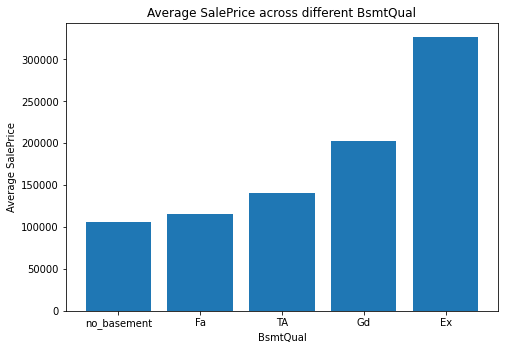

In [57]:
pivt = housing_data.pivot_table(index='BsmtQual',values='SalePrice',aggfunc = 'mean')
repaired_df = pd.DataFrame(pivt.to_records())
repaired_df = repaired_df.sort_values(by='SalePrice')
repaired_df.head()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repaired_df['BsmtQual'],repaired_df['SalePrice'])
ax.set_ylabel('Average SalePrice')
ax.set_xlabel('BsmtQual')
ax.set_title('Average SalePrice across different BsmtQual')
plt.show()

**Converting nominal categorical column 'BsmtQual' to ordinal**

In [58]:
housing_data['BsmtQual'].loc[housing_data['BsmtQual']=='no_basement'] = 1
housing_data['BsmtQual'].loc[housing_data['BsmtQual']=='Fa'] = 2
housing_data['BsmtQual'].loc[housing_data['BsmtQual']=='TA'] = 3
housing_data['BsmtQual'].loc[housing_data['BsmtQual']=='Gd'] = 4
housing_data['BsmtQual'].loc[housing_data['BsmtQual']=='Ex'] = 5

**Confirming that conversion happened as expected**

In [59]:
housing_data['BsmtQual'].value_counts()

3    649
4    618
5    121
1     37
2     35
Name: BsmtQual, dtype: int64

**Plotting different exterior quality levels versus average sales price of house**

**Insight: Price of house increases with increasing exterior quality, thus this feature can be converted into ordinal**

In [60]:
housing_data['ExterQual'].isnull().sum() #No null values in 'ExterQual' column

0

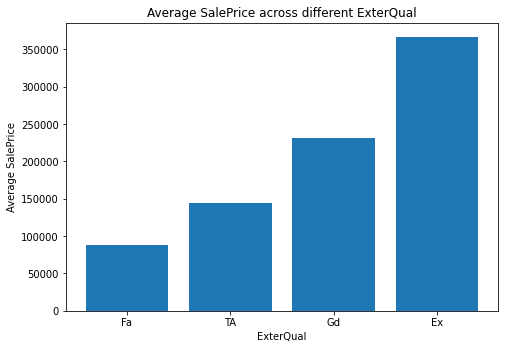

In [61]:
pivt = housing_data.pivot_table(index='ExterQual',values='SalePrice',aggfunc = 'mean')
repaired_df = pd.DataFrame(pivt.to_records())
repaired_df = repaired_df.sort_values(by='SalePrice')
repaired_df.head()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repaired_df['ExterQual'],repaired_df['SalePrice'])
ax.set_ylabel('Average SalePrice')
ax.set_xlabel('ExterQual')
ax.set_title('Average SalePrice across different ExterQual')
plt.show()

**Converting nominal categorical column 'ExterQual' to ordinal**

In [62]:
housing_data['ExterQual'].loc[housing_data['ExterQual']=='Fa'] = 1
housing_data['ExterQual'].loc[housing_data['ExterQual']=='TA'] = 2
housing_data['ExterQual'].loc[housing_data['ExterQual']=='Gd'] = 3
housing_data['ExterQual'].loc[housing_data['ExterQual']=='Ex'] = 4
housing_data['ExterQual'].value_counts()

2    906
3    488
4     52
1     14
Name: ExterQual, dtype: int64

# **Plotting different exterior condition levels versus average sales price of house**

In [63]:
housing_data['ExterCond'].isnull().sum() #No null values in 'ExterCond' column

0

**Checking data distribution across different categories**

In [64]:
housing_data['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

**Calculating average price by different categories**

In [65]:
pivt = housing_data.pivot_table(index='ExterCond',values='SalePrice',aggfunc = 'mean')
repaired_df = pd.DataFrame(pivt.to_records())
repaired_df = repaired_df.sort_values(by='SalePrice')
repaired_df.head()

,ExterCond,SalePrice
3,Po,76500.000000
1,Fa,102595.142857
2,Gd,168897.568493
4,TA,184034.896256
0,Ex,201333.333333


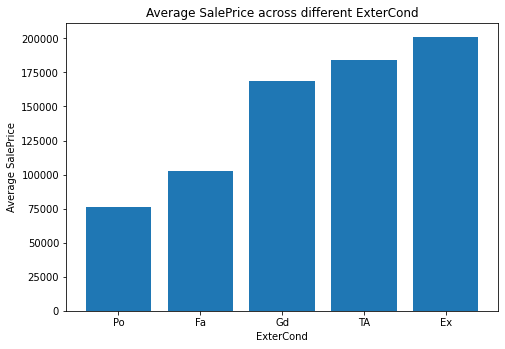

In [66]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repaired_df['ExterCond'],repaired_df['SalePrice'])
ax.set_ylabel('Average SalePrice')
ax.set_xlabel('ExterCond')
ax.set_title('Average SalePrice across different ExterCond')
plt.show()

**Converting nominal categorical column 'ExterCond' to ordinal**

In [67]:
housing_data['ExterCond'].loc[housing_data['ExterCond']=='Po'] = 1
housing_data['ExterCond'].loc[housing_data['ExterCond']=='Fa'] = 2
housing_data['ExterCond'].loc[housing_data['ExterCond']=='TA'] = 3
housing_data['ExterCond'].loc[housing_data['ExterCond']=='Gd'] = 4
housing_data['ExterCond'].loc[housing_data['ExterCond']=='Ex'] = 5
housing_data['ExterCond'].value_counts()

3    1282
4     146
2      28
5       3
1       1
Name: ExterCond, dtype: int64

**Checking distribution of values across levels of 'BsmtCond' variable**
**Insight: The variable is skewed with 90% values in 'TA' category, however, different categories have significant difference in Average Sales price and also form an Ordinal trend. Thus retaining this column and coverting into ordinal**

**Checking data distribution across different categories**

In [68]:
housing_data['BsmtCond'].isnull().sum() #Null values in 'BsmtExposure' column mean "no basement"

37

In [69]:
housing_data['BsmtCond'].fillna("no_basement", inplace = True) 

In [70]:
housing_data['BsmtCond'].isnull().sum()

0

In [71]:
housing_data['BsmtCond'].value_counts()

TA             1311
Gd               65
Fa               45
no_basement      37
Po                2
Name: BsmtCond, dtype: int64

**Calculating average price by different categories**

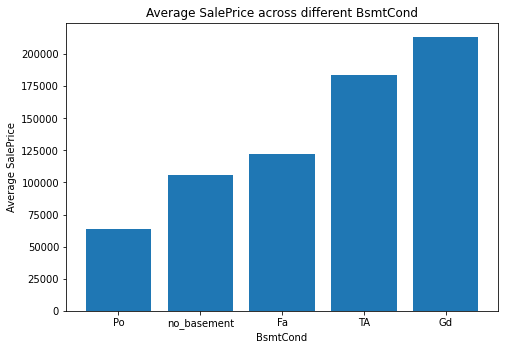

In [72]:
pivt = housing_data.pivot_table(index='BsmtCond',values='SalePrice',aggfunc = 'mean')
repaired_df = pd.DataFrame(pivt.to_records())
repaired_df = repaired_df.sort_values(by='SalePrice')
repaired_df.head()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repaired_df['BsmtCond'],repaired_df['SalePrice'])
ax.set_ylabel('Average SalePrice')
ax.set_xlabel('BsmtCond')
ax.set_title('Average SalePrice across different BsmtCond')
plt.show()

**Converting nominal categorical column 'BsmtCond' to ordinal**

In [73]:
housing_data['BsmtCond'].loc[housing_data['BsmtCond']=='Po'] = 1
housing_data['BsmtCond'].loc[housing_data['BsmtCond']=='no_basement'] = 2
housing_data['BsmtCond'].loc[housing_data['BsmtCond']=='Fa'] = 3
housing_data['BsmtCond'].loc[housing_data['BsmtCond']=='TA'] = 4
housing_data['BsmtCond'].loc[housing_data['BsmtCond']=='Gd'] = 5
housing_data['BsmtCond'].value_counts()

4    1311
5      65
3      45
2      37
1       2
Name: BsmtCond, dtype: int64

# **Plotting different BsmtExposure levels versus average sales price of house**

# **Insight: Price of house increases with increasing BsmtExposure, thus this feature can be converted into ordinal**

In [74]:
housing_data['BsmtExposure'].isnull().sum() #Null values in 'BsmtExposure' column mean "no basement"

38

**Converting Null values in 'BsmtExposure' column to "no basement"**

In [75]:
housing_data['BsmtExposure'].fillna("no_basement", inplace = True) 

In [76]:
housing_data['BsmtExposure'].isnull().sum() #No Null values remaining

0

**Checking data distribution across different categories**

In [77]:
housing_data['BsmtExposure'].value_counts()

No             953
Av             221
Gd             134
Mn             114
no_basement     38
Name: BsmtExposure, dtype: int64

**Calculating average price by different categories**

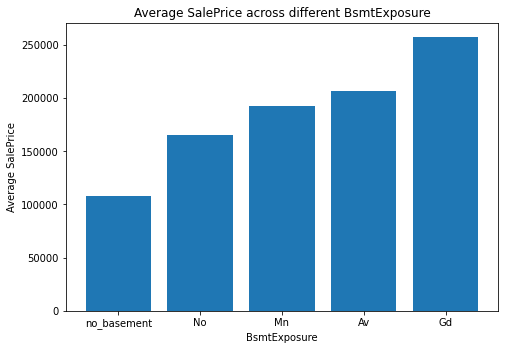

In [78]:
pivt = housing_data.pivot_table(index='BsmtExposure',values='SalePrice',aggfunc = 'mean')
repaired_df = pd.DataFrame(pivt.to_records())
repaired_df = repaired_df.sort_values(by='SalePrice')
repaired_df.head()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repaired_df['BsmtExposure'],repaired_df['SalePrice'])
ax.set_ylabel('Average SalePrice')
ax.set_xlabel('BsmtExposure')
ax.set_title('Average SalePrice across different BsmtExposure')
plt.show()

**Converting nominal categorical column 'BsmtExposure' to ordinal**

In [79]:
housing_data['BsmtExposure'].loc[housing_data['BsmtExposure']=='no_basement'] = 1
housing_data['BsmtExposure'].loc[housing_data['BsmtExposure']=='No'] = 2
housing_data['BsmtExposure'].loc[housing_data['BsmtExposure']=='Mn'] = 3
housing_data['BsmtExposure'].loc[housing_data['BsmtExposure']=='Av'] = 4
housing_data['BsmtExposure'].loc[housing_data['BsmtExposure']=='Gd'] = 5
housing_data['BsmtExposure'].value_counts()

2    953
4    221
5    134
3    114
1     38
Name: BsmtExposure, dtype: int64

# **Plotting different BsmtFinType1 levels versus average sales price of house**

# **Insight: Price of house increases with increasing BsmtFinType1, thus this feature can be converted into ordinal**

In [80]:
housing_data['BsmtFinType1'].isnull().sum() #Null values in 'BsmtFinType1' column mean "no basement"

37

**Converting Null values in 'BsmtFinType1' column to "no basement"**

In [81]:
housing_data['BsmtFinType1'].fillna("no_basement", inplace = True) 

In [82]:
housing_data['BsmtFinType1'].isnull().sum() #No Null values remaining

0

**Checking data distribution across different categories**

In [83]:
housing_data['BsmtFinType1'].value_counts()

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
no_basement     37
Name: BsmtFinType1, dtype: int64

**Calculating average price by different categories**

In [84]:
pivt = housing_data.pivot_table(index='BsmtFinType1',values='SalePrice',aggfunc = 'mean')
repaired_df = pd.DataFrame(pivt.to_records())
repaired_df = repaired_df.sort_values(by='SalePrice')
repaired_df.head(10)

,BsmtFinType1,SalePrice
6,no_basement,105652.891892
4,Rec,146889.248120
1,BLQ,149493.655405
3,LwQ,151852.702703
0,ALQ,161573.068182
5,Unf,170670.576744
2,GLQ,235413.720096


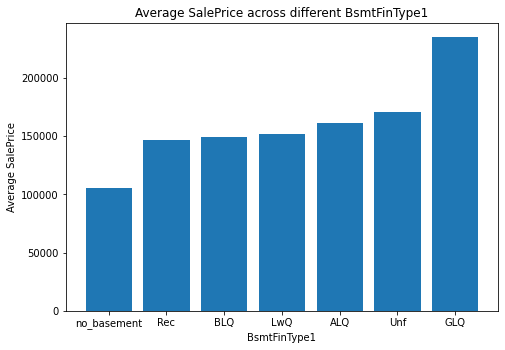

In [85]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repaired_df['BsmtFinType1'],repaired_df['SalePrice'])
ax.set_ylabel('Average SalePrice')
ax.set_xlabel('BsmtFinType1')
ax.set_title('Average SalePrice across different BsmtFinType1')
plt.show()

**Given average sales price is similar across these levels, combining levels 'Rec','BLQ','LwQ'**

In [86]:
housing_data['BsmtFinType1'].loc[housing_data['BsmtFinType1']=='no_basement'] = 1
housing_data['BsmtFinType1'].loc[housing_data['BsmtFinType1']=='Rec'] = 2
housing_data['BsmtFinType1'].loc[housing_data['BsmtFinType1']=='BLQ'] = 2
housing_data['BsmtFinType1'].loc[housing_data['BsmtFinType1']=='LwQ'] = 2
housing_data['BsmtFinType1'].loc[housing_data['BsmtFinType1']=='ALQ'] = 3
housing_data['BsmtFinType1'].loc[housing_data['BsmtFinType1']=='Unf'] = 4
housing_data['BsmtFinType1'].loc[housing_data['BsmtFinType1']=='GLQ'] = 5
housing_data['BsmtFinType1'].value_counts()

4    430
5    418
2    355
3    220
1     37
Name: BsmtFinType1, dtype: int64

# **Plotting different BsmtFinType2 levels versus average sales price of house**

# **Insight: Price of house increases with increasing BsmtFinType2, thus this feature can be converted into ordinal**

In [87]:
housing_data['BsmtFinType2'].isnull().sum() #Null values in 'BsmtFinType2' column mean "no basement"

38

**Converting Null values in 'BsmtFinType2' column to "no basement"**

In [88]:
housing_data['BsmtFinType2'].fillna("no_basement", inplace = True) 

In [89]:
housing_data['BsmtFinType2'].isnull().sum() #No Null values remaining

0

**Checking data distribution across different categories**

In [90]:
housing_data['BsmtFinType2'].value_counts()

Unf            1256
Rec              54
LwQ              46
no_basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

**Based on 'average sales price' per level, combining levels with similar avg. sales price, like: 'LwQ & Rec' , 'GLQ & Unf'**

In [91]:
pivt = housing_data.pivot_table(index='BsmtFinType2',values='SalePrice',aggfunc = 'mean')
repaired_df = pd.DataFrame(pivt.to_records())
repaired_df = repaired_df.sort_values(by='SalePrice')
repaired_df.head(10)

,BsmtFinType2,SalePrice
6,no_basement,110346.236842
1,BLQ,151101.000000
3,LwQ,164364.130435
4,Rec,164917.129630
2,GLQ,180982.142857
5,Unf,184694.690287
0,ALQ,209942.105263


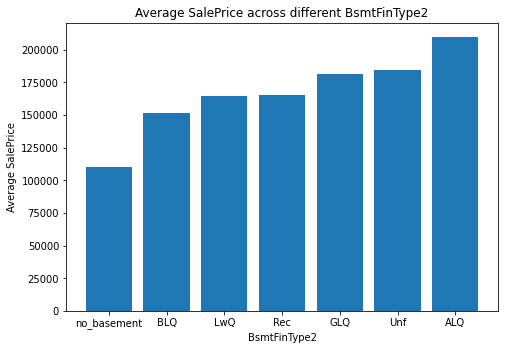

In [92]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repaired_df['BsmtFinType2'],repaired_df['SalePrice'])
ax.set_ylabel('Average SalePrice')
ax.set_xlabel('BsmtFinType2')
ax.set_title('Average SalePrice across different BsmtFinType2')
plt.show()

**Given average sales price is similar across these levels, combining levels 'LwQ with Rec' , 'GLQ with Unf'**

In [93]:
housing_data['BsmtFinType2'].loc[housing_data['BsmtFinType2']=='no_basement'] = 1
housing_data['BsmtFinType2'].loc[housing_data['BsmtFinType2']=='BLQ'] = 2
housing_data['BsmtFinType2'].loc[housing_data['BsmtFinType2']=='LwQ'] = 3
housing_data['BsmtFinType2'].loc[housing_data['BsmtFinType2']=='Rec'] = 3
housing_data['BsmtFinType2'].loc[housing_data['BsmtFinType2']=='GLQ'] = 4
housing_data['BsmtFinType2'].loc[housing_data['BsmtFinType2']=='Unf'] = 4
housing_data['BsmtFinType2'].loc[housing_data['BsmtFinType2']=='ALQ'] = 5
housing_data['BsmtFinType2'].value_counts()

4    1270
3     100
1      38
2      33
5      19
Name: BsmtFinType2, dtype: int64

# **Plotting different HeatingQC levels versus average sales price of house**

# **Insight: Price of house increases with increasing HeatingQC, thus this feature can be converted into ordinal**

**Checking total missing values in 'HeatingQC' column**

In [94]:
housing_data['HeatingQC'].isnull().sum()

0

**Checking data distribution across different categories**

In [95]:
housing_data['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

**Calculating average price by different categories**

In [96]:
pivt = housing_data.pivot_table(index='HeatingQC',values='SalePrice',aggfunc = 'mean')
repaired_df = pd.DataFrame(pivt.to_records())
repaired_df = repaired_df.sort_values(by='SalePrice')
repaired_df.head(10)

,HeatingQC,SalePrice
3,Po,87000.000000
1,Fa,123919.489796
4,TA,142362.876168
2,Gd,156858.871369
0,Ex,214914.429150


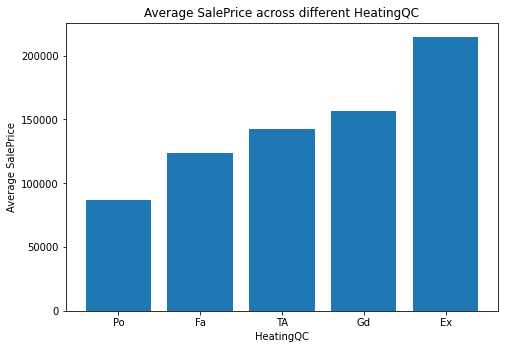

In [97]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repaired_df['HeatingQC'],repaired_df['SalePrice'])
ax.set_ylabel('Average SalePrice')
ax.set_xlabel('HeatingQC')
ax.set_title('Average SalePrice across different HeatingQC')
plt.show()

****

**Converting nominal categorical column 'HeatingQC' to ordinal**

In [98]:
housing_data['HeatingQC'].loc[housing_data['HeatingQC']=='Po'] = 1
housing_data['HeatingQC'].loc[housing_data['HeatingQC']=='Fa'] = 2
housing_data['HeatingQC'].loc[housing_data['HeatingQC']=='TA'] = 3
housing_data['HeatingQC'].loc[housing_data['HeatingQC']=='Gd'] = 4
housing_data['HeatingQC'].loc[housing_data['HeatingQC']=='Ex'] = 5
housing_data['HeatingQC'].value_counts()

5    741
3    428
4    241
2     49
1      1
Name: HeatingQC, dtype: int64

# **Plotting different KitchenQual levels versus average sales price of house**

# **Insight: Price of house increases with increasing KitchenQual, thus this feature can be converted into ordinal**

**Checking total missing values in 'KitchenQual' column**

In [99]:
housing_data['KitchenQual'].isnull().sum()

0

**Checking data distribution across different categories**

In [100]:
housing_data['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

**Calculating average price by different categories**

In [101]:
pivt = housing_data.pivot_table(index='KitchenQual',values='SalePrice',aggfunc = 'mean')
repaired_df = pd.DataFrame(pivt.to_records())
repaired_df = repaired_df.sort_values(by='SalePrice')
repaired_df.head(10)

,KitchenQual,SalePrice
1,Fa,105565.205128
3,TA,139962.511565
2,Gd,212116.023891
0,Ex,328554.670000


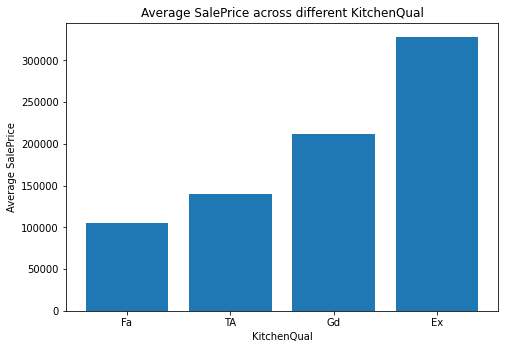

In [102]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repaired_df['KitchenQual'],repaired_df['SalePrice'])
ax.set_ylabel('Average SalePrice')
ax.set_xlabel('KitchenQual')
ax.set_title('Average SalePrice across different KitchenQual')
plt.show()

**Converting nominal categorical column 'KitchenQual' to ordinal**

In [103]:
housing_data['KitchenQual'].loc[housing_data['KitchenQual']=='Fa'] = 1
housing_data['KitchenQual'].loc[housing_data['KitchenQual']=='TA'] = 2
housing_data['KitchenQual'].loc[housing_data['KitchenQual']=='Gd'] = 3
housing_data['KitchenQual'].loc[housing_data['KitchenQual']=='Ex'] = 4
housing_data['KitchenQual'].value_counts()

2    735
3    586
4    100
1     39
Name: KitchenQual, dtype: int64

**Plotting different Functional levels versus average sales price of house**

**Insight: Price of house moves does not move ordinally with this feature, thus this feature is being left as is**

In [104]:
housing_data['Functional'].isnull().sum()

0

In [105]:
housing_data['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

**Calculating average price by different categories**

In [106]:
pivt = housing_data.pivot_table(index='Functional',values='SalePrice',aggfunc = 'mean')
repaired_df = pd.DataFrame(pivt.to_records())
repaired_df = repaired_df.sort_values(by='SalePrice')
repaired_df.head(10)

,Functional,SalePrice
1,Maj2,85800.000000
5,Sev,129000.000000
3,Min2,144240.647059
2,Min1,146385.483871
0,Maj1,153948.142857
4,Mod,168393.333333
6,Typ,183429.147059


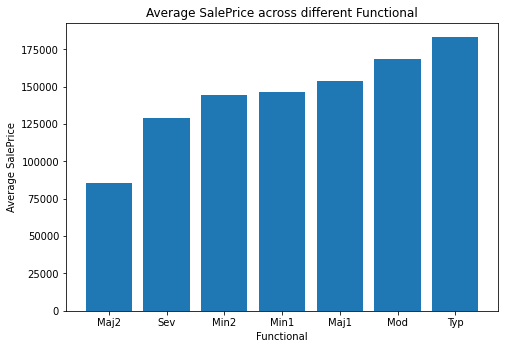

In [107]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repaired_df['Functional'],repaired_df['SalePrice'])
ax.set_ylabel('Average SalePrice')
ax.set_xlabel('Functional')
ax.set_title('Average SalePrice across different Functional')
plt.show()

**Plotting different FireplaceQu levels versus average sales price of house**

**Insight: FireplaceQu moves ordinally with sales price**

In [108]:
housing_data['FireplaceQu'].isnull().sum()

690

**Replacing null values with "no_fireplace" level**

In [109]:
housing_data['FireplaceQu'].fillna("no_fireplace", inplace = True) 

**Value counts across different levels**

In [110]:
housing_data['FireplaceQu'].value_counts()

no_fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

**Average price across different fireplace quality levels**

In [111]:
pivt = housing_data.pivot_table(index='FireplaceQu',values='SalePrice',aggfunc = 'mean')
repaired_df = pd.DataFrame(pivt.to_records())
repaired_df = repaired_df.sort_values(by='SalePrice')
repaired_df.head(10)

,FireplaceQu,SalePrice
3,Po,129764.150000
5,no_fireplace,141331.482609
1,Fa,167298.484848
4,TA,205723.488818
2,Gd,226351.415789
0,Ex,337712.500000


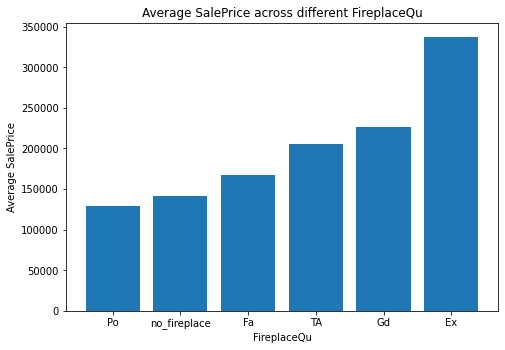

In [112]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repaired_df['FireplaceQu'],repaired_df['SalePrice'])
ax.set_ylabel('Average SalePrice')
ax.set_xlabel('FireplaceQu')
ax.set_title('Average SalePrice across different FireplaceQu')
plt.show()

In [113]:
housing_data['FireplaceQu'].loc[housing_data['FireplaceQu']=='Po'] = 1
housing_data['FireplaceQu'].loc[housing_data['FireplaceQu']=='no_fireplace'] = 2
housing_data['FireplaceQu'].loc[housing_data['FireplaceQu']=='Fa'] = 3
housing_data['FireplaceQu'].loc[housing_data['FireplaceQu']=='TA'] = 4
housing_data['FireplaceQu'].loc[housing_data['FireplaceQu']=='Gd'] = 5
housing_data['FireplaceQu'].loc[housing_data['FireplaceQu']=='Ex'] = 6
housing_data['FireplaceQu'].value_counts()

2    690
5    380
4    313
3     33
6     24
1     20
Name: FireplaceQu, dtype: int64

**Plotting different GarageFinish levels versus average sales price of house**

**Insight: Price of house moves ordinally with this feature**

In [114]:
housing_data['GarageFinish'].isnull().sum()

81

In [115]:
housing_data['GarageFinish'].fillna("no_garage", inplace = True) 

In [116]:
housing_data['GarageFinish'].value_counts()

Unf          605
RFn          422
Fin          352
no_garage     81
Name: GarageFinish, dtype: int64

In [117]:
pivt = housing_data.pivot_table(index='GarageFinish',values='SalePrice',aggfunc = 'mean')
repaired_df = pd.DataFrame(pivt.to_records())
repaired_df = repaired_df.sort_values(by='SalePrice')
repaired_df.head(10)

,GarageFinish,SalePrice
3,no_garage,103317.283951
2,Unf,142156.423140
1,RFn,202068.869668
0,Fin,240052.690341


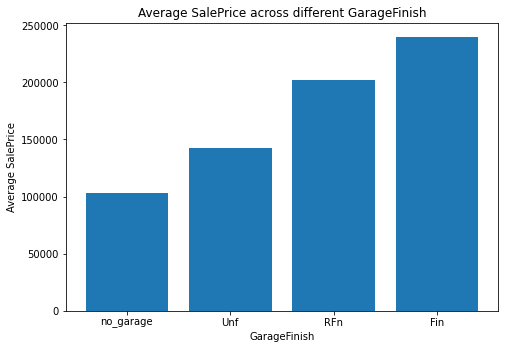

In [118]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repaired_df['GarageFinish'],repaired_df['SalePrice'])
ax.set_ylabel('Average SalePrice')
ax.set_xlabel('GarageFinish')
ax.set_title('Average SalePrice across different GarageFinish')
plt.show()

In [119]:
housing_data['GarageFinish'].loc[housing_data['GarageFinish']=='no_garage'] = 1
housing_data['GarageFinish'].loc[housing_data['GarageFinish']=='Unf'] = 2
housing_data['GarageFinish'].loc[housing_data['GarageFinish']=='RFn'] = 3
housing_data['GarageFinish'].loc[housing_data['GarageFinish']=='Fin'] = 4
housing_data['GarageFinish'].value_counts()

2    605
3    422
4    352
1     81
Name: GarageFinish, dtype: int64

**Plotting different GarageQual levels versus average sales price of house**

**Insight: Price of house moves ordinally with this feature**

In [120]:
housing_data['GarageQual'].isnull().sum() 

81

In [121]:
housing_data['GarageQual'].fillna("no_garage", inplace = True) 

In [122]:
housing_data['GarageQual'].value_counts()

TA           1311
no_garage      81
Fa             48
Gd             14
Po              3
Ex              3
Name: GarageQual, dtype: int64

In [123]:
pivt = housing_data.pivot_table(index='GarageQual',values='SalePrice',aggfunc = 'mean')
repaired_df = pd.DataFrame(pivt.to_records())
repaired_df = repaired_df.sort_values(by='SalePrice')
repaired_df.head(10)

,GarageQual,SalePrice
3,Po,100166.666667
5,no_garage,103317.283951
1,Fa,123573.354167
4,TA,187489.836003
2,Gd,215860.714286
0,Ex,241000.000000


**Combining levels 'Po' and 'no_garage' as they have similar average sales price.**

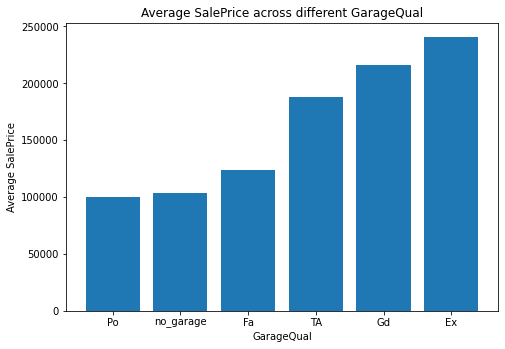

In [124]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repaired_df['GarageQual'],repaired_df['SalePrice'])
ax.set_ylabel('Average SalePrice')
ax.set_xlabel('GarageQual')
ax.set_title('Average SalePrice across different GarageQual')
plt.show()

In [125]:
housing_data['GarageQual'].loc[housing_data['GarageQual']=='no_garage'] = 1
housing_data['GarageQual'].loc[housing_data['GarageQual']=='Po'] = 1
housing_data['GarageQual'].loc[housing_data['GarageQual']=='Fa'] = 2
housing_data['GarageQual'].loc[housing_data['GarageQual']=='TA'] = 3
housing_data['GarageQual'].loc[housing_data['GarageQual']=='Gd'] = 4
housing_data['GarageQual'].loc[housing_data['GarageQual']=='Ex'] = 5
housing_data['GarageQual'].value_counts()

3    1311
1      84
2      48
4      14
5       3
Name: GarageQual, dtype: int64

**Plotting different GarageCond levels versus average sales price of house**

**Insight: Price of house does not move ordinally with this feature**

In [126]:
housing_data['GarageCond'].isnull().sum() 

81

In [127]:
housing_data['GarageCond'].fillna("no_garage", inplace = True) 

In [128]:
housing_data['GarageCond'].value_counts()

TA           1326
no_garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

In [129]:
pivt = housing_data.pivot_table(index='GarageCond',values='SalePrice',aggfunc = 'mean')
repaired_df = pd.DataFrame(pivt.to_records())
repaired_df = repaired_df.sort_values(by='SalePrice')
repaired_df.head(10)

,GarageCond,SalePrice
5,no_garage,103317.283951
3,Po,108500.000000
1,Fa,114654.028571
0,Ex,124000.000000
2,Gd,179930.000000
4,TA,187885.735294


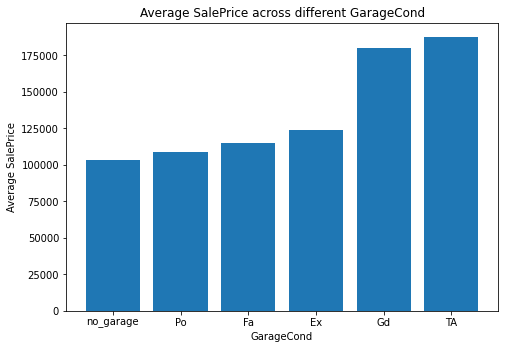

In [130]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repaired_df['GarageCond'],repaired_df['SalePrice'])
ax.set_ylabel('Average SalePrice')
ax.set_xlabel('GarageCond')
ax.set_title('Average SalePrice across different GarageCond')
plt.show()

**Plotting different Fence levels versus average sales price of house**

**Insight: Price of house does not move ordinally with this feature**

In [131]:
housing_data['Fence'].isnull().sum()

1179

In [132]:
housing_data['Fence'].fillna("no_fence", inplace = True) 

In [133]:
housing_data['Fence'].value_counts()

no_fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

In [134]:
pivt = housing_data.pivot_table(index='Fence',values='SalePrice',aggfunc = 'mean')
repaired_df = pd.DataFrame(pivt.to_records())
repaired_df = repaired_df.sort_values(by='SalePrice')
repaired_df.head(10)

,Fence,SalePrice
3,MnWw,134286.363636
1,GdWo,140379.314815
2,MnPrv,148751.089172
0,GdPrv,178927.457627
4,no_fence,187596.837998


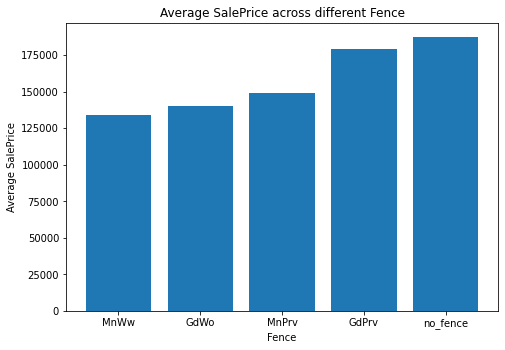

In [135]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repaired_df['Fence'],repaired_df['SalePrice'])
ax.set_ylabel('Average SalePrice')
ax.set_xlabel('Fence')
ax.set_title('Average SalePrice across different Fence')
plt.show()

# **Outlier assesment for target variable**

**We can see significant number of outliers in the box plot below in target variable**

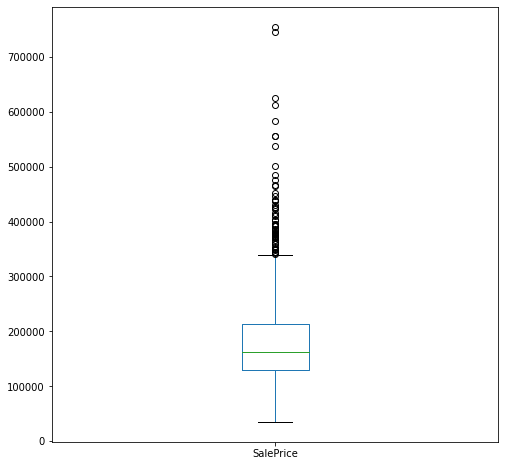

In [136]:
df_box_plot_data = housing_data[["SalePrice"]].copy()
df_box_plot_data.plot(kind='box', figsize=(8,8))
plt.show()

**These outliers are skewing the target varible distribution as displayed below**

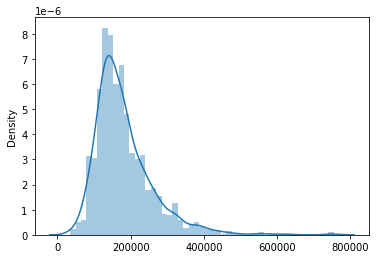

In [137]:
sns.distplot(df_box_plot_data)

**Generally log transform helps in managing such skewness, as seen below, thus transforming target variable through log transformation**

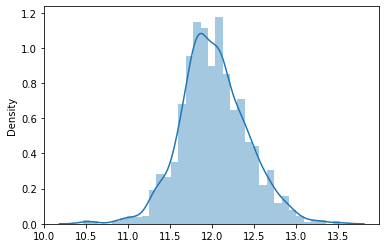

In [138]:
sns.distplot(np.log(df_box_plot_data))

In [139]:
housing_data["SalePrice_log_trasformed"] = 0
housing_data["SalePrice_log_trasformed"] = (np.log(df_box_plot_data)).copy()

**Checking if transformation worked as intended, indeed it has !**

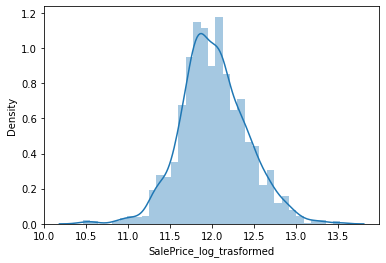

In [140]:
sns.distplot(housing_data["SalePrice_log_trasformed"])
housing_data = housing_data.drop(['SalePrice'],axis=1)

In [141]:
housing_continuous_vars.remove("SalePrice")

**Converting year columns to meaningful features (age, time since remodeling etc)**

In [142]:
housing_data["house_total_age"] = 0
housing_data["house_total_age"] = 2020 - housing_data ["YearBuilt"]
housing_data = housing_data.drop(['YearBuilt'],axis=1)#dropping year column after conversion
housing_continuous_vars.remove('YearBuilt')#removing dropped column from 'housing_continuous_vars'
housing_data["house_total_age"].head()

0     17
1     44
2     19
3    105
4     20
Name: house_total_age, dtype: int64

In [143]:
housing_data["house_time_since_remodel"] = 0
housing_data["house_time_since_remodel"] = 2020 - housing_data ["YearRemodAdd"]
housing_data = housing_data.drop(['YearRemodAdd'],axis=1)#dropping year column after conversion
housing_continuous_vars.remove('YearRemodAdd')#removing dropped column from 'housing_continuous_vars'
housing_data["house_time_since_remodel"].head()

0    17
1    44
2    18
3    50
4    20
Name: house_time_since_remodel, dtype: int64

In [144]:
housing_data["garage_age"] = 0
housing_data["garage_age"] = 2020 - housing_data ["GarageYrBlt"]
housing_data = housing_data.drop(['GarageYrBlt'],axis=1)#dropping year column after conversion
housing_continuous_vars.remove('GarageYrBlt')#removing dropped column from 'housing_continuous_vars'
housing_data["garage_age"].head()


0    17.0
1    44.0
2    19.0
3    22.0
4    20.0
Name: garage_age, dtype: float64

In [145]:
housing_data["years_since_sale"] = 0
housing_data["years_since_sale"] = 2020 - housing_data ["YrSold"]
housing_data = housing_data.drop(['YrSold'],axis=1)#dropping year column after conversion
housing_data = housing_data.drop(['MoSold'],axis=1)#dropping month column after conversion
housing_continuous_vars.remove('YrSold') #removing dropped column from 'housing_continuous_vars'
housing_continuous_vars.remove('MoSold')#removing dropped column from 'housing_continuous_vars'
housing_data["years_since_sale"].head()

0    12
1    13
2    12
3    14
4    12
Name: years_since_sale, dtype: int64

In [146]:
new_features = list()
new_features = ('years_since_sale','garage_age','house_time_since_remodel','house_total_age','SalePrice_log_trasformed')

for i in new_features:
  housing_continuous_vars.append(i)

In [147]:
#storing them in a dataframe because we later need to calculate % nulls per column
housing_data_columns = pd.DataFrame(housing_data.isnull().sum())

#renaming dataframe column for better interpretability
housing_data_columns.rename(columns = {0:'missing_values'}, inplace = True) 

#converting indexs (column names) into a dataframe columns
missing_values_across_columns = housing_data_columns.reset_index()

#renaming newly creating index column for better interpretability
missing_values_across_columns.rename(columns = {'index':'col_names'}, inplace = True) 

missing_values_across_columns['prcnt_missing_values'] = 0 #initializing a new column in dataframe with prcnt missing values
missing_values_across_columns['prcnt_missing_values'] = round(((missing_values_across_columns['missing_values'] / 1460)*100),2) #calculating percent missing values
missing_values_across_columns = missing_values_across_columns.sort_values(by=['prcnt_missing_values'] , ascending=False) #sorting in descending order
missing_values_across_columns.head(10) #missing_values_across_columns dataframe contains missing percent missing values across all columns

,col_names,missing_values,prcnt_missing_values
2,LotFrontage,259,17.74
67,garage_age,81,5.55
47,GarageType,81,5.55
17,MasVnrArea,8,0.55
16,MasVnrType,8,0.55
0,MSSubClass,0,0.00
45,Fireplaces,0,0.00
50,GarageArea,0,0.00
49,GarageCars,0,0.00
48,GarageFinish,0,0.00


In [148]:
housing_data[['LotFrontage','garage_age','GarageType','MasVnrArea','MasVnrType','HalfBath','BedroomAbvGr']].head()

,LotFrontage,garage_age,GarageType,MasVnrArea,MasVnrType,HalfBath,BedroomAbvGr
0,65.0,17.0,Attchd,196.0,BrkFace,1,3
1,80.0,44.0,Attchd,0.0,None,0,3
2,68.0,19.0,Attchd,162.0,BrkFace,1,3
3,60.0,22.0,Detchd,0.0,None,0,3
4,84.0,20.0,Attchd,350.0,BrkFace,1,4


In [149]:
housing_data[['GarageType','MasVnrType']].describe()

,GarageType,MasVnrType
count,1379,1452
unique,6,4
top,Attchd,None
freq,870,864


In [150]:
housing_data['GarageType'].fillna("no_garage", inplace = True) 
housing_data['MasVnrType'].fillna("no_masonary", inplace = True)
housing_data['MasVnrArea'].fillna(0, inplace = True) 
housing_data['HalfBath'].fillna(0, inplace = True)
housing_data['BedroomAbvGr'].fillna(0, inplace = True)
housing_data['LotFrontage'].fillna(0, inplace = True)
housing_data['garage_age'].fillna(max(housing_data['garage_age']), inplace = True)

In [151]:
#storing them in a dataframe because we later need to calculate % nulls per column
housing_data_columns = pd.DataFrame(housing_data.isnull().sum())

#renaming dataframe column for better interpretability
housing_data_columns.rename(columns = {0:'missing_values'}, inplace = True) 

#converting indexs (column names) into a dataframe columns
missing_values_across_columns = housing_data_columns.reset_index()

#renaming newly creating index column for better interpretability
missing_values_across_columns.rename(columns = {'index':'col_names'}, inplace = True) 

missing_values_across_columns['prcnt_missing_values'] = 0 #initializing a new column in dataframe with prcnt missing values
missing_values_across_columns['prcnt_missing_values'] = round(((missing_values_across_columns['missing_values'] / 1460)*100),2) #calculating percent missing values
missing_values_across_columns = missing_values_across_columns.sort_values(by=['prcnt_missing_values'] , ascending=False) #sorting in descending order
missing_values_across_columns.head(10) #missing_values_across_columns dataframe contains missing percent missing values across all columns

,col_names,missing_values,prcnt_missing_values
0,MSSubClass,0,0.0
44,Functional,0,0.0
50,GarageArea,0,0.0
49,GarageCars,0,0.0
48,GarageFinish,0,0.0
47,GarageType,0,0.0
46,FireplaceQu,0,0.0
45,Fireplaces,0,0.0
43,TotRmsAbvGrd,0,0.0
35,GrLivArea,0,0.0


**Correlation analysis**

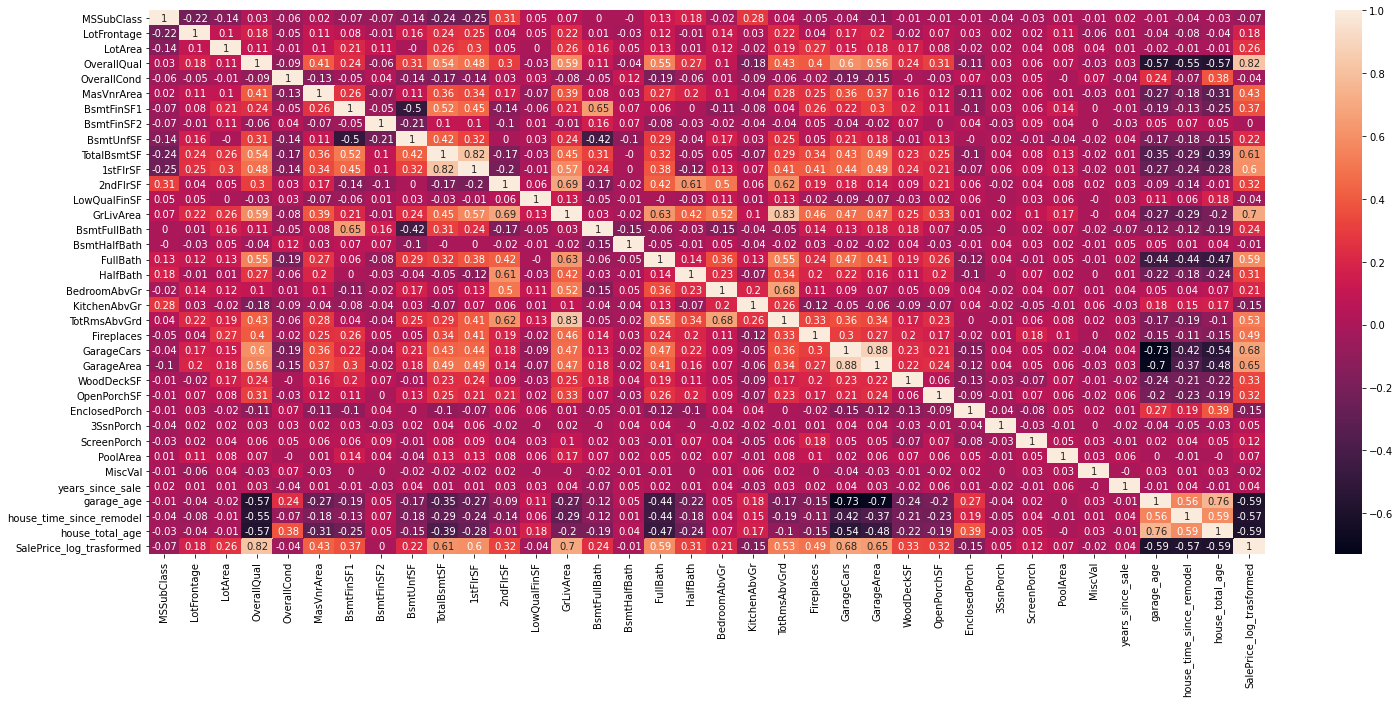

In [152]:
#creating correlation matrix
correlation_matrix = housing_data[housing_continuous_vars].corr().round(2)

#overlaying heatmap on top of correlation matrix

# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(25,10))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)

**Dropping features with extremely low correlation [-0.1 to 0.1]**

In [153]:
low_corr_features = list()
low_corr_features = ('MiscVal','PoolArea','3SsnPorch','BsmtHalfBath','LowQualFinSF','BsmtFinSF2','OverallCond','MSSubClass')
for i in low_corr_features:
  housing_data = housing_data.drop(i,axis=1)
  housing_continuous_vars.remove(i)


**Dummy encoding categorical columns**

drop_first is set to 'True' to drop 1st dummy column for every variable which is dummy encoded.

In [154]:
print("shape of dataframe before dummy encoding:",housing_data.shape)

shape of dataframe before dummy encoding: (1460, 61)


In [155]:
housing_data_with_dummies = pd.get_dummies(housing_data,drop_first=True).copy()
housing_data_with_dummies.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice_log_trasformed,house_total_age,house_time_since_remodel,garage_age,years_since_sale,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_2,FireplaceQu_3,FireplaceQu_4,FireplaceQu_5,FireplaceQu_6,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_no_garage,GarageFinish_2,GarageFinish_3,GarageFinish_4,GarageQual_2,GarageQual_3,GarageQual_4,GarageQual_5,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_no_garage,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_no_fence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,196.0,706,150,856,856,854,1710,1,2,1,3,1,8,0,2,548,0,61,0,0,12.247694,17,17,17.0,12,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,6,1,2,460,298,0,0,0,12.109011,44,44,44.0,13,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,162.0,486,434,920,920,866,1786,1,2,1,3,1,6,1,2,608,0,42,0,0,12.317167,19,18,19.0,12,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,0.0,216,540,756,961,756,1717,1,1,0,3,1,7,1,3,642,0,35,272,0,11.849398,105,50,22.0,14,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,9,1,3,836,192,84,0,0,12.429216,20,20,20.0,12,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [156]:
print("shape of dataframe after dummy encoding:",housing_data_with_dummies.shape)

shape of dataframe after dummy encoding: (1460, 211)


**Train-Test split**

In [157]:
housing_xbase = housing_data_with_dummies.copy().drop(['SalePrice_log_trasformed'],axis=1)
housing_ybase = housing_data_with_dummies.copy()['SalePrice_log_trasformed']
x_train, x_test, y_train, y_test = train_test_split(housing_xbase, housing_ybase, test_size=0.20, random_state=42)

In [158]:
housing_continuous_features = housing_continuous_vars.copy()
housing_continuous_features.remove("SalePrice_log_trasformed")

**Fitting on train data and scaling/transforming continuous variables in training data**

In [159]:
scaler = MinMaxScaler() #StandardScaler() 
x_train[housing_continuous_features] = scaler.fit_transform(x_train[housing_continuous_features])
x_train[housing_continuous_features].head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,years_since_sale,garage_age,house_time_since_remodel,house_total_age
254,0.223642,0.033186,0.444444,0.000000,0.163359,0.167808,0.215057,0.224874,0.000000,0.184627,0.333333,0.333333,0.0,0.375,0.333333,0.250000,0.000000,0.25,0.207334,0.291715,0.000000,0.000000,0.0,0.00,0.481818,0.883333,0.384058
1066,0.188498,0.030555,0.555556,0.000000,0.000000,0.342038,0.130769,0.106700,0.373850,0.233044,0.000000,0.666667,0.5,0.375,0.333333,0.416667,0.333333,0.50,0.267983,0.000000,0.073126,0.000000,0.0,0.25,0.154545,0.266667,0.123188
638,0.214058,0.034948,0.444444,0.000000,0.000000,0.340753,0.130278,0.106012,0.000000,0.087038,0.000000,0.333333,0.0,0.250,0.333333,0.166667,0.000000,0.00,0.000000,0.382730,0.000000,0.297101,0.0,0.50,1.000000,1.000000,0.724638
799,0.191693,0.027577,0.444444,0.182874,0.100815,0.069349,0.119640,0.148463,0.381114,0.270158,0.333333,0.333333,0.5,0.375,0.333333,0.416667,0.666667,0.25,0.169252,0.000000,0.000000,0.478261,0.0,0.75,0.645455,1.000000,0.528986
380,0.159744,0.017294,0.444444,0.000000,0.038625,0.345890,0.167921,0.158788,0.322034,0.255652,0.000000,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.25,0.217207,0.000000,0.000000,0.438406,0.0,0.00,0.781818,1.000000,0.623188


**Not fitting on test data and just scaling/transforming continuous variables in test data**

In [160]:
x_test[housing_continuous_features] = scaler.transform(x_test[housing_continuous_features])
x_test[housing_continuous_features].head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,years_since_sale,garage_age,house_time_since_remodel,house_total_age
892,0.223642,0.033252,0.555556,0.000000,0.117470,0.169521,0.173322,0.168426,0.000000,0.138282,0.000000,0.333333,0.0,0.375,0.333333,0.333333,0.000000,0.25,0.186178,0.224037,0.000000,0.000000,0.0,1.00,0.427273,0.116667,0.340580
1105,0.313099,0.051209,0.777778,0.262700,0.182849,0.184503,0.239444,0.267554,0.543341,0.431047,0.333333,0.666667,0.5,0.375,0.333333,0.583333,0.666667,0.50,0.502116,0.217036,0.058501,0.000000,0.0,0.00,0.145455,0.250000,0.115942
413,0.178914,0.035804,0.444444,0.000000,0.000000,0.431507,0.164975,0.159247,0.000000,0.130746,0.000000,0.333333,0.0,0.250,0.333333,0.250000,0.333333,0.50,0.253879,0.000000,0.000000,0.235507,0.0,0.00,0.754545,1.000000,0.601449
522,0.159744,0.017294,0.555556,0.000000,0.070695,0.258990,0.164321,0.153740,0.319613,0.250565,0.000000,0.666667,0.0,0.375,0.333333,0.416667,0.666667,0.50,0.296192,0.000000,0.043876,0.065217,0.0,1.00,0.545455,1.000000,0.456522
1036,0.284345,0.054210,0.888889,0.050798,0.181077,0.255993,0.265139,0.295089,0.000000,0.242276,0.333333,0.666667,0.0,0.250,0.333333,0.333333,0.333333,0.75,0.643159,0.266044,0.000000,0.000000,0.0,0.25,0.018182,0.033333,0.021739


**Building a OLS model without RFE to check impact of RFE**

In [198]:
X = x_train
y = y_train

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  210


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.918
Model:                                  OLS   Adj. R-squared:                  0.901
Method:                       Least Squares   F-statistic:                     53.24
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              11:53:59   Log-Likelihood:                 902.56
No. Observations:                      1168   AIC:                            -1397.
Df Residuals:                           964   BIC:                            -364.3
Df Model:                               203                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-

**For model with all features**
**Number of features considered in model building: 210**

**Adjusted R-square: 0.901**

**Running recurcive feature elimination with cross validation**

In [185]:
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
X = x_train
target = y_train
rfc = SVR(kernel="linear")
#rfc =  RandomForestClassifier(random_state=101) #LogisticRegression(random_state=101)
rfe = RFE(estimator=rfc, step=1)
rfe.fit(X, target)

RFE(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                  gamma='scale', kernel='linear', max_iter=-1, shrinking=True,
                  tol=0.001, verbose=False),
    n_features_to_select=None, step=1, verbose=0)

In [176]:
rfe.n_features_

105

In [175]:
rfe.ranking_

array([ 70,   1,   1,  26,   1,  78,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
        33,   1,   1,   1,   1,   1,  64,  82,   1,   1,   1,   1,   1,
         1,  46, 105,   1,   1,   1,  18,   1,   1,  43,  69,   1,  12,
        79,  94,  62,   1,   1,  77,   1,  96,  29,   1,   1,  91,   1,
         1,   1,   1,  13,  63,  16, 102,   8,  40,   1,   1,   1,  42,
        17,  22,  75,   9,  57,  54,   1,   1,   1,   1,  51, 103,   1,
         1,  97,  86,   1,  98,  37,  53,  99,  68,  50,   1,   1,  52,
         1,  92, 100,   1,   1,  35,  38,  36,  89, 106,   1,  87,   1,
        81,   1,   1,   7,  28,   6,   5,   1,  88,   1,   1,   1,  24,
        23,   1,   1,   1,  47,   1,  19,   1,  58,   1,  11,  21,   1,
        60,  61,   1,  48,   1,  30,   1,  45,  85,  20,  80,  32,  73,
        72,   1,   1,  65,  90,   1,   1,  15,  56,   1,   1,   1,  10,
         1,  95,  59,   1,   1,  55,   2,  74,   3,  67,  27,  7

In [187]:
rfe.get_support() #list of booleans

array([False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False,  True,  True, False, False,  True, False, False, False,
       False,  True,  True, False,  True, False, False,  True,  True,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
        True,  True, False, False,  True, False, False, False, False,
       False, False,  True,  True, False,  True, False, False,  True,
        True, False, False, False, False, False,  True, False,  True,
       False,  True,  True, False, False, False, False,  True, False,
        True,  True,

In [189]:
feature_names = list(X.columns.values) #extracting feature names from training data split.

In [191]:
mask = rfe.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)

In [193]:
len(new_features)#list of selected features

105

In [270]:
X_rfe = x_train[new_features]
y = y_train

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  105


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.910
Model:                                  OLS   Adj. R-squared:                  0.901
Method:                       Least Squares   F-statistic:                     102.3
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:19:57   Log-Likelihood:                 847.51
No. Observations:                      1168   AIC:                            -1483.
Df Residuals:                          1062   BIC:                            -946.3
Df Model:                               105                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-

# **Insights:**

*   **RFE is able to reduce features by 50% (105 from 210) without any impact on adjusted R-Square**
*   **Adjusted r-sq is constant at 0.901 which is a very healthy stat for model performance**



**Calculating VIFs for independent variables**

In [271]:
vif_estimation_data_frame = add_constant(X_rfe)
vif = pd.Series([variance_inflation_factor(vif_estimation_data_frame.values, i) 
               for i in range(vif_estimation_data_frame.shape[1])], 
              index=vif_estimation_data_frame.columns)
vif_df = pd.DataFrame(vif)
vif_df.rename(columns = {0:'vif_value'}, inplace = True) 
vif_df = vif_df.reset_index()
vif_df.rename(columns = {'index':'Features'}, inplace = True) 
vif_df = vif_df.sort_values(by="vif_value", ascending=False)
vif_df.head(10)

,Features,vif_value
0,const,865.800970
7,GrLivArea,159.489843
105,SaleCondition_Partial,119.070590
101,SaleType_New,117.079504
6,2ndFlrSF,113.259610
5,1stFlrSF,92.668438
26,MSZoning_RL,59.102342
27,MSZoning_RM,44.579628
53,RoofStyle_Gable,23.716467
55,RoofStyle_Hip,23.051844


# **Removing features with high p-value and VIF**

**Iteration 1: Removing "SaleCondition_Partial", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [272]:
X_rfe = X_rfe.drop(['SaleCondition_Partial'],axis=1) #removing feature with high p-value and VIF

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  104


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.910
Model:                                  OLS   Adj. R-squared:                  0.901
Method:                       Least Squares   F-statistic:                     103.4
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:01   Log-Likelihood:                 847.51
No. Observations:                      1168   AIC:                            -1485.
Df Residuals:                          1063   BIC:                            -953.4
Df Model:                               104                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-

In [273]:
vif_estimation_data_frame = add_constant(X_rfe)
vif = pd.Series([variance_inflation_factor(vif_estimation_data_frame.values, i) 
               for i in range(vif_estimation_data_frame.shape[1])], 
              index=vif_estimation_data_frame.columns)
vif_df = pd.DataFrame(vif)
vif_df.rename(columns = {0:'vif_value'}, inplace = True) 
vif_df = vif_df.reset_index()
vif_df.rename(columns = {'index':'Features'}, inplace = True) 
vif_df = vif_df.sort_values(by="vif_value", ascending=False)
vif_df.head(10)

,Features,vif_value
0,const,862.958396
7,GrLivArea,159.276282
6,2ndFlrSF,113.110358
5,1stFlrSF,92.547062
26,MSZoning_RL,58.888629
27,MSZoning_RM,44.402696
53,RoofStyle_Gable,23.711985
55,RoofStyle_Hip,23.050202
24,MSZoning_FV,20.061478
21,house_total_age,7.581994


**Iteration 2: Removing "1stFlrSF", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [274]:
X_rfe = X_rfe.drop(['1stFlrSF'],axis=1) #removing feature with high p-value and VIF

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  103


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.910
Model:                                  OLS   Adj. R-squared:                  0.901
Method:                       Least Squares   F-statistic:                     104.4
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:03   Log-Likelihood:                 847.27
No. Observations:                      1168   AIC:                            -1487.
Df Residuals:                          1064   BIC:                            -960.0
Df Model:                               103                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-

In [275]:
vif_estimation_data_frame = add_constant(X_rfe)
vif = pd.Series([variance_inflation_factor(vif_estimation_data_frame.values, i) 
               for i in range(vif_estimation_data_frame.shape[1])], 
              index=vif_estimation_data_frame.columns)
vif_df = pd.DataFrame(vif)
vif_df.rename(columns = {0:'vif_value'}, inplace = True) 
vif_df = vif_df.reset_index()
vif_df.rename(columns = {'index':'Features'}, inplace = True) 
vif_df = vif_df.sort_values(by="vif_value", ascending=False)
vif_df.head(10)

,Features,vif_value
0,const,854.643658
25,MSZoning_RL,57.807121
26,MSZoning_RM,43.714793
52,RoofStyle_Gable,23.710266
54,RoofStyle_Hip,23.049745
23,MSZoning_FV,19.835077
6,GrLivArea,15.245944
5,2ndFlrSF,8.924925
20,house_total_age,7.576305
69,ExterCond_3,6.901467


**Iteration 3: Removing "RoofStyle_Hip", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [276]:
X_rfe = X_rfe.drop(['RoofStyle_Hip'],axis=1) #removing feature with high p-value and VIF

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  102


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.910
Model:                                  OLS   Adj. R-squared:                  0.901
Method:                       Least Squares   F-statistic:                     105.3
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:06   Log-Likelihood:                 845.80
No. Observations:                      1168   AIC:                            -1486.
Df Residuals:                          1065   BIC:                            -964.1
Df Model:                               102                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-

In [277]:
vif_estimation_data_frame = add_constant(X_rfe)
vif = pd.Series([variance_inflation_factor(vif_estimation_data_frame.values, i) 
               for i in range(vif_estimation_data_frame.shape[1])], 
              index=vif_estimation_data_frame.columns)
vif_df = pd.DataFrame(vif)
vif_df.rename(columns = {0:'vif_value'}, inplace = True) 
vif_df = vif_df.reset_index()
vif_df.rename(columns = {'index':'Features'}, inplace = True) 
vif_df = vif_df.sort_values(by="vif_value", ascending=False)
vif_df.head(20)

,Features,vif_value
0,const,702.478229
25,MSZoning_RL,57.757862
26,MSZoning_RM,43.690687
23,MSZoning_FV,19.821786
6,GrLivArea,15.219188
5,2ndFlrSF,8.920440
20,house_total_age,7.571045
68,ExterCond_3,6.892533
69,ExterCond_4,6.648281
22,garage_age,6.643256


**Iteration 4: Removing "SaleCondition_Family", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [278]:
X_rfe = X_rfe.drop(['SaleCondition_Family'],axis=1).copy() #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  101


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.910
Model:                                  OLS   Adj. R-squared:                  0.901
Method:                       Least Squares   F-statistic:                     106.4
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:08   Log-Likelihood:                 845.80
No. Observations:                      1168   AIC:                            -1488.
Df Residuals:                          1066   BIC:                            -971.2
Df Model:                               101                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-

In [279]:
vif_estimation_data_frame = add_constant(X_rfe)
vif = pd.Series([variance_inflation_factor(vif_estimation_data_frame.values, i) 
               for i in range(vif_estimation_data_frame.shape[1])], 
              index=vif_estimation_data_frame.columns)
vif_df = pd.DataFrame(vif)
vif_df.rename(columns = {0:'vif_value'}, inplace = True) 
vif_df = vif_df.reset_index()
vif_df.rename(columns = {'index':'Features'}, inplace = True) 
vif_df = vif_df.sort_values(by="vif_value", ascending=False)
vif_df.head()

,Features,vif_value
0,const,702.350157
25,MSZoning_RL,57.699407
26,MSZoning_RM,43.602335
23,MSZoning_FV,19.806706
6,GrLivArea,15.190508


**Iteration 5: Removing "Condition1_Feedr", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [280]:
X_rfe = X_rfe.drop(['Condition1_Feedr'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  100


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.910
Model:                                  OLS   Adj. R-squared:                  0.901
Method:                       Least Squares   F-statistic:                     107.6
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:10   Log-Likelihood:                 845.80
No. Observations:                      1168   AIC:                            -1490.
Df Residuals:                          1067   BIC:                            -978.2
Df Model:                               100                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-

**Iteration 6: Removing "SaleType_ConLI", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [281]:
X_rfe = X_rfe.drop(['SaleType_ConLI'],axis=1) #removing feature with high p-value and VIF

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  99


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.910
Model:                                  OLS   Adj. R-squared:                  0.901
Method:                       Least Squares   F-statistic:                     108.7
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:10   Log-Likelihood:                 845.80
No. Observations:                      1168   AIC:                            -1492.
Df Residuals:                          1068   BIC:                            -985.3
Df Model:                                99                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 7: Removing "Exterior2nd_Brk Cmn ", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [282]:
X_rfe = X_rfe.drop(['Exterior2nd_Brk Cmn'],axis=1) #removing feature with high p-value and VIF

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  98


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.910
Model:                                  OLS   Adj. R-squared:                  0.901
Method:                       Least Squares   F-statistic:                     110.0
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:10   Log-Likelihood:                 845.79
No. Observations:                      1168   AIC:                            -1494.
Df Residuals:                          1069   BIC:                            -992.3
Df Model:                                98                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 8: Removing "FireplaceQu_3", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit. In fact Adj. R-Sq increased slightly from 0.901 to 0.902**

In [283]:
X_rfe = X_rfe.drop(['FireplaceQu_3'],axis=1) #removing feature with high p-value and VIF

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  97


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.910
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     111.2
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:10   Log-Likelihood:                 845.77
No. Observations:                      1168   AIC:                            -1496.
Df Residuals:                          1070   BIC:                            -999.4
Df Model:                                97                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 8: Removing "TotalBsmtSF", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [284]:
X_rfe = X_rfe.drop(['TotalBsmtSF'],axis=1) #removing feature with high p-value and VIF

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  96


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.910
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     112.4
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:10   Log-Likelihood:                 845.73
No. Observations:                      1168   AIC:                            -1497.
Df Residuals:                          1071   BIC:                            -1006.
Df Model:                                96                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 9: Removing "GarageArea", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [285]:
X_rfe = X_rfe.drop(['GarageArea'],axis=1) #removing feature with high p-value and VIF

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  95


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.910
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     113.7
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:11   Log-Likelihood:                 845.69
No. Observations:                      1168   AIC:                            -1499.
Df Residuals:                          1072   BIC:                            -1013.
Df Model:                                95                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 10: Removing "RoofStyle_Gambrel", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [286]:
X_rfe = X_rfe.drop(['RoofStyle_Gambrel'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  94


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.910
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     115.0
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:11   Log-Likelihood:                 845.64
No. Observations:                      1168   AIC:                            -1501.
Df Residuals:                          1073   BIC:                            -1020.
Df Model:                                94                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 11: Removing "MasVnrType_BrkFace", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [287]:
X_rfe = X_rfe.drop(['MasVnrType_BrkFace'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  93


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.910
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     116.4
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:11   Log-Likelihood:                 845.56
No. Observations:                      1168   AIC:                            -1503.
Df Residuals:                          1074   BIC:                            -1027.
Df Model:                                93                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 12: Removing "Condition1_PosA", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [288]:
X_rfe = X_rfe.drop(['Condition1_PosA'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  92


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.910
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     117.7
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:11   Log-Likelihood:                 845.34
No. Observations:                      1168   AIC:                            -1505.
Df Residuals:                          1075   BIC:                            -1034.
Df Model:                                92                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 13: Removing "OpenPorchSF", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [289]:
X_rfe = X_rfe.drop(['OpenPorchSF'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  91


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.910
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     119.0
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:11   Log-Likelihood:                 845.07
No. Observations:                      1168   AIC:                            -1506.
Df Residuals:                          1076   BIC:                            -1040.
Df Model:                                91                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 14: Removing "FireplaceQu_6", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [290]:
X_rfe = X_rfe.drop(['FireplaceQu_6'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  90


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.910
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     120.4
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:11   Log-Likelihood:                 844.82
No. Observations:                      1168   AIC:                            -1508.
Df Residuals:                          1077   BIC:                            -1047.
Df Model:                                90                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 15: Removing "Foundation_Wood", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [291]:
X_rfe = X_rfe.drop(['Foundation_Wood'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  89


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.910
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     121.8
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:11   Log-Likelihood:                 844.52
No. Observations:                      1168   AIC:                            -1509.
Df Residuals:                          1078   BIC:                            -1053.
Df Model:                                89                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 15: Removing "EnclosedPorch", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [292]:
X_rfe = X_rfe.drop(['EnclosedPorch'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  88


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.909
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     123.2
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:11   Log-Likelihood:                 844.12
No. Observations:                      1168   AIC:                            -1510.
Df Residuals:                          1079   BIC:                            -1060.
Df Model:                                88                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 16: Removing "Exterior2nd_CmentBd", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [293]:
X_rfe = X_rfe.drop(['Exterior2nd_CmentBd'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  87


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.909
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     124.6
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:11   Log-Likelihood:                 843.66
No. Observations:                      1168   AIC:                            -1511.
Df Residuals:                          1080   BIC:                            -1066.
Df Model:                                87                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 17: Removing "ExterQual_4", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [294]:
X_rfe = X_rfe.drop(['ExterQual_4'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  86


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.909
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     126.1
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:11   Log-Likelihood:                 843.15
No. Observations:                      1168   AIC:                            -1512.
Df Residuals:                          1081   BIC:                            -1072.
Df Model:                                86                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 18: Removing "RoofStyle_Gable", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [295]:
X_rfe = X_rfe.drop(['RoofStyle_Gable'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  85


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.909
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     127.6
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:12   Log-Likelihood:                 842.63
No. Observations:                      1168   AIC:                            -1513.
Df Residuals:                          1082   BIC:                            -1078.
Df Model:                                85                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 19: Removing "LotConfig_FR3", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [296]:
X_rfe = X_rfe.drop(['LotConfig_FR3'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  84


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.909
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     129.1
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:12   Log-Likelihood:                 842.09
No. Observations:                      1168   AIC:                            -1514.
Df Residuals:                          1083   BIC:                            -1084.
Df Model:                                84                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 20: Removing "Exterior2nd_HdBoard", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [297]:
X_rfe = X_rfe.drop(['Exterior2nd_HdBoard'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  83


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.909
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     130.6
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:12   Log-Likelihood:                 841.50
No. Observations:                      1168   AIC:                            -1515.
Df Residuals:                          1084   BIC:                            -1090.
Df Model:                                83                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 21: Removing "Exterior2nd_Stucco", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [298]:
X_rfe = X_rfe.drop(['Exterior2nd_Stucco'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  82


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.909
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     132.1
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:12   Log-Likelihood:                 840.86
No. Observations:                      1168   AIC:                            -1516.
Df Residuals:                          1085   BIC:                            -1095.
Df Model:                                82                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 22: Removing "Functional_Mod", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [299]:
X_rfe = X_rfe.drop(['Functional_Mod'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  81


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.909
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     133.7
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:12   Log-Likelihood:                 840.21
No. Observations:                      1168   AIC:                            -1516.
Df Residuals:                          1086   BIC:                            -1101.
Df Model:                                81                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 23: Removing "Neighborhood_BrDale", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [300]:
X_rfe = X_rfe.drop(['Neighborhood_BrDale'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  80


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.909
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     135.3
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:12   Log-Likelihood:                 839.44
No. Observations:                      1168   AIC:                            -1517.
Df Residuals:                          1087   BIC:                            -1107.
Df Model:                                80                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 24: Removing "MasVnrType_None", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [301]:
X_rfe = X_rfe.drop(['MasVnrType_None'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  79


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.909
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     137.0
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:12   Log-Likelihood:                 838.68
No. Observations:                      1168   AIC:                            -1517.
Df Residuals:                          1088   BIC:                            -1112.
Df Model:                                79                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 25: Removing "LotConfig_FR2", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [302]:
X_rfe = X_rfe.drop(['LotConfig_FR2'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  78


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.909
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     138.7
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:12   Log-Likelihood:                 837.85
No. Observations:                      1168   AIC:                            -1518.
Df Residuals:                          1089   BIC:                            -1118.
Df Model:                                78                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 26: Removing "BsmtQual_3", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [303]:
X_rfe = X_rfe.drop(['BsmtQual_3'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  77


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.908
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     140.4
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:12   Log-Likelihood:                 837.03
No. Observations:                      1168   AIC:                            -1518.
Df Residuals:                          1090   BIC:                            -1123.
Df Model:                                77                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 27: Removing "RoofStyle_Mansard", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [304]:
X_rfe = X_rfe.drop(['RoofStyle_Mansard'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  76


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.908
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     142.1
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:13   Log-Likelihood:                 836.16
No. Observations:                      1168   AIC:                            -1518.
Df Residuals:                          1091   BIC:                            -1128.
Df Model:                                76                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 28: Removing "GarageCond_Po", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [305]:
X_rfe = X_rfe.drop(['GarageCond_Po'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  75


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.908
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     143.9
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:13   Log-Likelihood:                 835.15
No. Observations:                      1168   AIC:                            -1518.
Df Residuals:                          1092   BIC:                            -1133.
Df Model:                                75                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 29: Removing "BsmtFinSF1", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [306]:
X_rfe = X_rfe.drop(['BsmtFinSF1'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  74


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.908
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     145.6
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:13   Log-Likelihood:                 834.06
No. Observations:                      1168   AIC:                            -1518.
Df Residuals:                          1093   BIC:                            -1138.
Df Model:                                74                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 30: Removing "LotArea", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [307]:
X_rfe = X_rfe.drop(['LotArea'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  73


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.908
Model:                                  OLS   Adj. R-squared:                  0.902
Method:                       Least Squares   F-statistic:                     147.4
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:20:13   Log-Likelihood:                 832.74
No. Observations:                      1168   AIC:                            -1517.
Df Residuals:                          1094   BIC:                            -1143.
Df Model:                                73                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 31: Removing "BldgType_Duplex", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [309]:
X_rfe = X_rfe.drop(['BldgType_Duplex'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  72


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.907
Model:                                  OLS   Adj. R-squared:                  0.901
Method:                       Least Squares   F-statistic:                     149.2
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:37:16   Log-Likelihood:                 831.25
No. Observations:                      1168   AIC:                            -1516.
Df Residuals:                          1095   BIC:                            -1147.
Df Model:                                72                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 32: Removing "Exterior1st_BrkComm", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [310]:
X_rfe = X_rfe.drop(['Exterior1st_BrkComm'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  71


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.907
Model:                                  OLS   Adj. R-squared:                  0.901
Method:                       Least Squares   F-statistic:                     151.0
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:37:38   Log-Likelihood:                 829.78
No. Observations:                      1168   AIC:                            -1516.
Df Residuals:                          1096   BIC:                            -1151.
Df Model:                                71                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 33: Removing "garage_age", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [311]:
X_rfe = X_rfe.drop(['garage_age'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  70


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.907
Model:                                  OLS   Adj. R-squared:                  0.901
Method:                       Least Squares   F-statistic:                     152.8
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:38:10   Log-Likelihood:                 828.27
No. Observations:                      1168   AIC:                            -1515.
Df Residuals:                          1097   BIC:                            -1155.
Df Model:                                70                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 34 Removing "SaleType_CWD", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [312]:
X_rfe = X_rfe.drop(['SaleType_CWD'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  69


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.907
Model:                                  OLS   Adj. R-squared:                  0.901
Method:                       Least Squares   F-statistic:                     154.7
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:39:05   Log-Likelihood:                 826.62
No. Observations:                      1168   AIC:                            -1513.
Df Residuals:                          1098   BIC:                            -1159.
Df Model:                                69                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 35: Removing "BsmtExposure_2", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [313]:
X_rfe = X_rfe.drop(['BsmtExposure_2'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  68


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.906
Model:                                  OLS   Adj. R-squared:                  0.901
Method:                       Least Squares   F-statistic:                     156.6
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:40:16   Log-Likelihood:                 824.81
No. Observations:                      1168   AIC:                            -1512.
Df Residuals:                          1099   BIC:                            -1162.
Df Model:                                68                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 36: Removing "TotRmsAbvGrd", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [314]:
X_rfe = X_rfe.drop(['TotRmsAbvGrd'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  67


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.906
Model:                                  OLS   Adj. R-squared:                  0.900
Method:                       Least Squares   F-statistic:                     158.5
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:41:32   Log-Likelihood:                 822.99
No. Observations:                      1168   AIC:                            -1510.
Df Residuals:                          1100   BIC:                            -1166.
Df Model:                                67                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 37: Removing "Neighborhood_SWISU", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [315]:
X_rfe = X_rfe.drop(['Neighborhood_SWISU'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  66


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.906
Model:                                  OLS   Adj. R-squared:                  0.900
Method:                       Least Squares   F-statistic:                     160.6
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:42:41   Log-Likelihood:                 821.25
No. Observations:                      1168   AIC:                            -1508.
Df Residuals:                          1101   BIC:                            -1169.
Df Model:                                66                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 38: Removing "house_total_age", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [316]:
X_rfe = X_rfe.drop(['house_total_age'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  65


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.906
Model:                                  OLS   Adj. R-squared:                  0.900
Method:                       Least Squares   F-statistic:                     162.8
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:43:09   Log-Likelihood:                 819.99
No. Observations:                      1168   AIC:                            -1508.
Df Residuals:                          1102   BIC:                            -1174.
Df Model:                                65                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Iteration 39: Removing "Foundation_Stone", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [317]:
X_rfe = X_rfe.drop(['Foundation_Stone'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  64


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.905
Model:                                  OLS   Adj. R-squared:                  0.900
Method:                       Least Squares   F-statistic:                     165.0
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:43:31   Log-Likelihood:                 818.57
No. Observations:                      1168   AIC:                            -1507.
Df Residuals:                          1103   BIC:                            -1178.
Df Model:                                64                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

In [318]:
vif_estimation_data_frame = add_constant(X_rfe)
vif = pd.Series([variance_inflation_factor(vif_estimation_data_frame.values, i) 
               for i in range(vif_estimation_data_frame.shape[1])], 
              index=vif_estimation_data_frame.columns)
vif_df = pd.DataFrame(vif)
vif_df.rename(columns = {0:'vif_value'}, inplace = True) 
vif_df = vif_df.reset_index()
vif_df.rename(columns = {'index':'Features'}, inplace = True) 
vif_df = vif_df.sort_values(by="vif_value", ascending=False)
vif_df.head()

,Features,vif_value
0,const,512.958359
16,MSZoning_RL,54.780284
17,MSZoning_RM,41.817723
14,MSZoning_FV,18.990400
41,ExterCond_3,6.407903


**Iteration 40: Removing "", no change in Adj. R-squared confirms that we can drop this feature without any significant impact on model fit**

In [319]:
X_rfe = X_rfe.drop(['MSZoning_RL'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  63


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.904
Model:                                  OLS   Adj. R-squared:                  0.899
Method:                       Least Squares   F-statistic:                     165.3
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:45:41   Log-Likelihood:                 810.75
No. Observations:                      1168   AIC:                            -1493.
Df Residuals:                          1104   BIC:                            -1169.
Df Model:                                63                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

In [320]:
vif_estimation_data_frame = add_constant(X_rfe)
vif = pd.Series([variance_inflation_factor(vif_estimation_data_frame.values, i) 
               for i in range(vif_estimation_data_frame.shape[1])], 
              index=vif_estimation_data_frame.columns)
vif_df = pd.DataFrame(vif)
vif_df.rename(columns = {0:'vif_value'}, inplace = True) 
vif_df = vif_df.reset_index()
vif_df.rename(columns = {'index':'Features'}, inplace = True) 
vif_df = vif_df.sort_values(by="vif_value", ascending=False)
vif_df.head()

,Features,vif_value
0,const,217.045695
40,ExterCond_3,6.406787
41,ExterCond_4,6.204983
3,GrLivArea,5.650905
29,Neighborhood_Somerst,4.888553


In [321]:
X_rfe = X_rfe.drop(['ExterCond_3'],axis=1) #removing feature with high p-value

X2 = sm.add_constant(X_rfe)
est = sm.OLS(y, X2)
est2 = est.fit()
print("Number of features considered in model building: ",len(X_rfe.columns))
print("\n")
print(est2.summary())

Number of features considered in model building:  62


                               OLS Regression Results                               
Dep. Variable:     SalePrice_log_trasformed   R-squared:                       0.903
Model:                                  OLS   Adj. R-squared:                  0.898
Method:                       Least Squares   F-statistic:                     166.2
Date:                      Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                              13:46:33   Log-Likelihood:                 804.69
No. Observations:                      1168   AIC:                            -1483.
Df Residuals:                          1105   BIC:                            -1164.
Df Model:                                62                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--

**Trend of Ridge regression Alpha values vs R2 score over a large range of Alpha values**

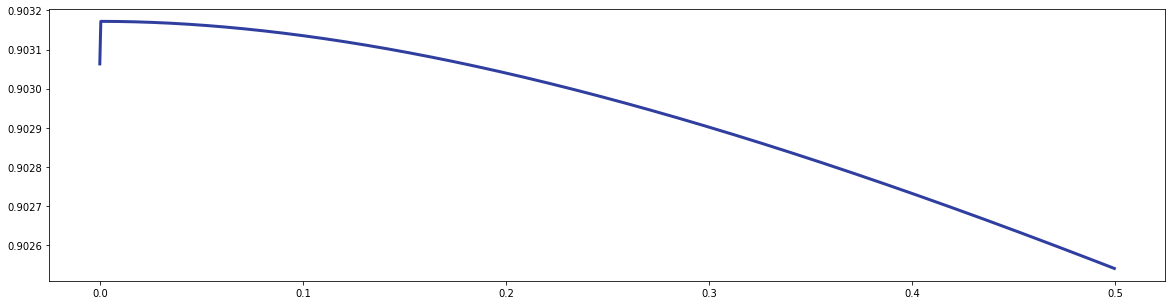

In [354]:
from sklearn.linear_model import Ridge
lpha_value_list = list()
score_value_list = list()

for alpha_value in np.arange(0,0.5,0.0005):
  clf = Ridge(alpha=alpha_value)
  clf.fit(X2, y)
  alpha_value_list.append(alpha_value)
  score_value_list.append(clf.score(X2, y, sample_weight=None))

plt.figure(figsize=(20, 5))
plt.xlabel('Alpha values for Ridge regression', fontsize=14, labelpad=20)
plt.ylabel('R2 scores at different alpha values', fontsize=14, labelpad=20)
plt.plot(alpha_value_list, score_value_list, color='#303F9F', linewidth=3)

**Plotting and selecting optimum value of Ridge Alpha, for which R2 score is maximum.**

Ridge regression optimum alpha score 0.000050000




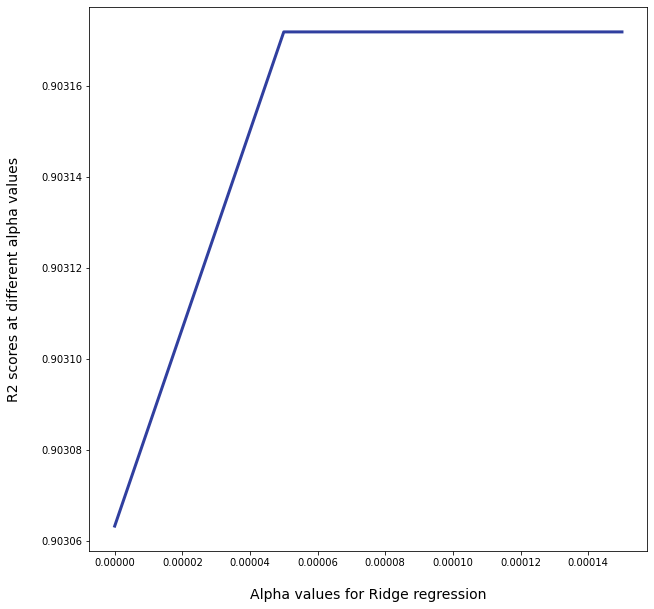

In [397]:
alpha_value_list = list()
score_value_list = list()

for alpha_value in np.arange(0,0.0002,0.00005):
  clf = Ridge(alpha=alpha_value)
  clf.fit(X2, y)
  alpha_value_list.append(alpha_value)
  score_value_list.append(clf.score(X2, y, sample_weight=None))

optimum_ridge_alpha = alpha_value_list[score_value_list.index(max(score_value_list))]
optimum_ridge_alpha = f"{optimum_ridge_alpha:.9f}"
print("Ridge regression optimum alpha score", optimum_ridge_alpha)
print("\n")
plt.figure(figsize=(10, 10))
plt.xlabel('Alpha values for Ridge regression', fontsize=14, labelpad=20)
plt.ylabel('R2 scores at different alpha values', fontsize=14, labelpad=20)
plt.plot(alpha_value_list, score_value_list, color='#303F9F', linewidth=3)

**R2 score value in Ridge regression at optimum alpha value**

---



In [369]:
print("Ridge regression optimum alpha score", optimum_ridge_alpha)
print("\n")
clf_opti = Ridge(alpha=optimum_ridge_alpha)
clf_opti.fit(X2, y)
print("R2 score value in Ridge regression at optimum alpha value: ", clf_opti.score(X2, y, sample_weight=None))

Ridge regression optimum alpha score 0.000050000


R2 score value in Ridge regression at optimum alpha value:  0.9031720086046378


**R2 score value in Ridge regression when we DOUBLE the alpha value from optimum value**

In [370]:
double_alpha = 2*float(optimum_ridge_alpha)
print("Value of double the alpha:",double_alpha)
clf_dbl = Ridge(alpha=double_alpha)
clf_dbl.fit(X2, y)
print("R2 score value in Ridge regression at double the optimum alpha value: ", clf_dbl.score(X2, y, sample_weight=None))
print("Absolute drop in accuracy:",(clf_opti.score(X2, y, sample_weight=None) - clf_dbl.score(X2, y, sample_weight=None)))

Value of double the alpha: 0.0001
R2 score value in Ridge regression at double the optimum alpha value:  0.9031720085740074
absolute drop in accuracy: 3.0630387115593294e-11


# **Insight**
**There is a very slight drop in R2 score for Ridge regression when we double the alpha. This is also a characteristic of current model configuration (features already eliminated) resulting into low alpha value (double of a very low value is also a low value)**

**This drop in R2 score is because we are giving higher weightage to creating a simpler model versus model fit, thus model's complexity is reduced at the cost model's fit.**

**Calculating absolute weights/coefficients for individual model features, to determine feature importance**

In [380]:
clf_dbl_coef = np.sqrt(np.square(clf_dbl.coef_))
clf_opti_coef = np.sqrt(np.square(clf_opti.coef_))

**Top 5 coefficients by weight when ridge alpha value is optimum**

In [385]:
ridge_weights_opti = pd.DataFrame()
ridge_weights_opti['weights_opti']= pd.Series(clf_opti_coef)
ridge_weights_opti['features_opti']= pd.Series(X2.columns)
ridge_weights_opti=ridge_weights_opti.sort_values(by="weights_opti",ascending=False)
ridge_weights_opti.head()

,weights_opti,features_opti
3,1.143468,GrLivArea
1,0.525188,OverallQual
51,0.288617,Functional_Maj2
52,0.254030,Functional_Sev
8,0.253118,KitchenAbvGr


**Top 5 coefficients by weight when ridge alpha value is doubled**

**Insight: When alpha value is doubled for ridge regression the absolute feature weights have slightly reduced for top 5 features.**

In [386]:
ridge_weights_dbl = pd.DataFrame()
ridge_weights_dbl['weights_dbl']= pd.Series(clf_dbl_coef)
ridge_weights_dbl['features_dbl']= pd.Series(X2.columns)
ridge_weights_dbl=ridge_weights_dbl.sort_values(by="weights_dbl",ascending=False)
ridge_weights_dbl.head()

,weights_dbl,features_dbl
3,1.143442,GrLivArea
1,0.525189,OverallQual
51,0.288613,Functional_Maj2
52,0.254015,Functional_Sev
8,0.253112,KitchenAbvGr


**Visualising model fit (determined by R-sq.) with increasing alpha value for lasso**

Lasso regression optimum alpha score 0.0




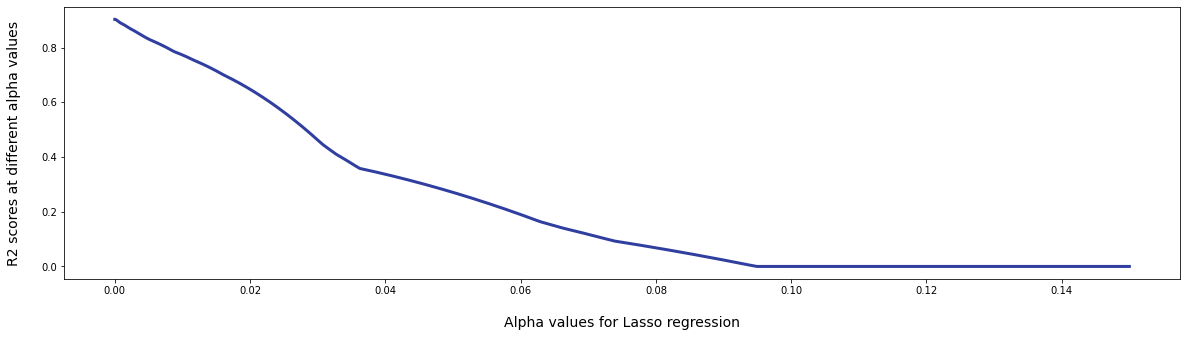

In [394]:
from sklearn import linear_model
alpha_value_list = list()
score_value_list = list()
for alpha_value in np.arange(0,0.15,0.000005):
  clf = linear_model.Lasso(alpha=alpha_value)
  clf.fit(X2, y)
  alpha_value_list.append(alpha_value)
  score_value_list.append(clf.score(X2, y, sample_weight=None))
optimum_lasso_alpha = alpha_value_list[score_value_list.index(max(score_value_list))]
print("Lasso regression optimum alpha score", optimum_lasso_alpha)
print("\n")
plt.figure(figsize=(20, 5))
plt.xlabel('Alpha values for Lasso regression', fontsize=14, labelpad=20)
plt.ylabel('R2 scores at different alpha values', fontsize=14, labelpad=20)
plt.plot(alpha_value_list, score_value_list, color='#303F9F', linewidth=3)

**r2 score is at maximum value of 0.9 for "alpha=0"**

In [439]:
clf_lasso_opti = linear_model.Lasso(alpha=0)
clf_lasso_opti.fit(X2, y)
print("r2 score: ",(round(clf.score(X2, y, sample_weight=None),2)*100))

r2 score:  90.0


**r2 score is still at maximum value of 0.9 for "alpha=0.00056", post which it will start dropping**

In [459]:
clf_lasso_opti = linear_model.Lasso(alpha=0.00056)
clf_lasso_opti.fit(X2, y)
print("r2 score: ",(round(clf_lasso_opti.score(X2, y, sample_weight=None),2)*100))

r2 score:  90.0


**The r2 score drops slightly when alpha score is doubled from optimal value.**

In [440]:
clf = linear_model.Lasso(alpha=0.00112)
clf.fit(X2, y)
print("r2 score: ",(round(clf.score(X2, y, sample_weight=None),2)*100))

r2 score:  89.0


In [460]:
optimum_lasso_alpha = 0.00056
double_alpha = 2*float(optimum_lasso_alpha)
print("Value of double the alpha:",double_alpha)
clf_lasso_dbl = linear_model.Lasso(alpha=double_alpha)
clf_lasso_dbl.fit(X2, y)
print("R2 score value in Laso regression at double the optimum alpha value: ", clf_dbl.score(X2, y, sample_weight=None))
print("Absolute drop in accuracy:",(clf_opti.score(X2, y, sample_weight=None) - clf_dbl.score(X2, y, sample_weight=None)))

Value of double the alpha: 0.00112
R2 score value in Laso regression at double the optimum alpha value:  0.8864484497039015
Absolute drop in accuracy: 0.01672355890073629


In [461]:
clf_lasso_dbl_coeff = np.sqrt(np.square(clf_lasso_opti.coef_))
clf_lasso_opti_coeff = np.sqrt(np.square(clf_lasso_opti.coef_))

In [466]:
lasso_weights_opti = pd.DataFrame()
lasso_weights_opti['weights_opti']= pd.Series(clf_lasso_opti_coeff)
lasso_weights_opti['features_opti']= pd.Series(X2.columns)
lasso_weights_opti=lasso_weights_opti.sort_values(by="weights_opti",ascending=False)
lasso_weights_opti.head()


,weights_opti,features_opti
3,0.931236,GrLivArea
1,0.605219,OverallQual
10,0.275644,GarageCars
4,0.147243,BsmtFullBath
30,0.141994,Neighborhood_StoneBr


In [468]:
lasso_weights_opti.shape

(63, 2)

In [465]:
lasso_weights_dbl = pd.DataFrame()
lasso_weights_dbl['weights_dbl']= pd.Series(clf_lasso_dbl_coeff)
lasso_weights_dbl['features_dbl']= pd.Series(X2.columns)
lasso_weights_dbl=lasso_weights_dbl.sort_values(by="weights_dbl",ascending=False)
lasso_weights_dbl.head()

,weights_dbl,features_dbl
3,0.931236,GrLivArea
1,0.605219,OverallQual
10,0.275644,GarageCars
4,0.147243,BsmtFullBath
30,0.141994,Neighborhood_StoneBr


In [469]:
lasso_weights_dbl.shape

(63, 2)

**Training R-sq of Ridge vs Lasso regression**

In [479]:
clf_opti = Ridge(alpha=0.00005)
clf_opti.fit(X2, y)
print("R2 score value in Ridge regression at optimum alpha value @ training data: ", clf_opti.score(X2, y, sample_weight=None))

clf_lasso_opti = linear_model.Lasso(alpha=0.00056)
clf_lasso_opti.fit(X2, y)
print("R2 score value in Lasso regression at optimum alpha value @ training data: ",clf_lasso_opti.score(X2, y, sample_weight=None))

R2 score value in Ridge regression at optimum alpha value @ training data:  0.9031720086046378
R2 score value in Lasso regression at optimum alpha value @ training data:  0.8950459195899307


**Test set R-sq for Ridge vs Lasso regression**

In [480]:
X2_test = sm.add_constant(x_test).copy()
print("R2 score value in Ridge regression at optimum alpha value @ testing data: ",clf_opti.score(X2_test[X2.columns], y_test, sample_weight=None))
print("R2 score value in Lasso regression at optimum alpha value @ testing data: ",clf_lasso_opti.score(X2_test[X2.columns], y_test, sample_weight=None))

R2 score value in Ridge regression at optimum alpha value @ testing data:  0.8798905625339807
R2 score value in Lasso regression at optimum alpha value @ testing data:  0.8832649389856004


**%drop in test R-sq from training accuracy for Ridge and Lasso**

In [477]:
print("% Drop in test accuracy for Ridge regression",((clf_opti.score(X2_test[X2.columns], y_test, sample_weight=None))/(clf_opti.score(X2, y, sample_weight=None))-1))
print("% Drop in test accuracy for Lasso regression",((clf_lasso_opti.score(X2_test[X2.columns], y_test, sample_weight=None))/(clf_lasso_opti.score(X2, y, sample_weight=None))-1))

% Drop in test accuracy for Ridge regression -0.013162431498182636


**Ridge regression has higher drop in R-sq from training to testing set, which demonstrates better generalisation by Lasso classifier. Thus we would be using Lasso classifier for final predictions**

**Feature importance plot**

Text(0.5, 1.0, 'Feature importance')

<Figure size 432x288 with 0 Axes>

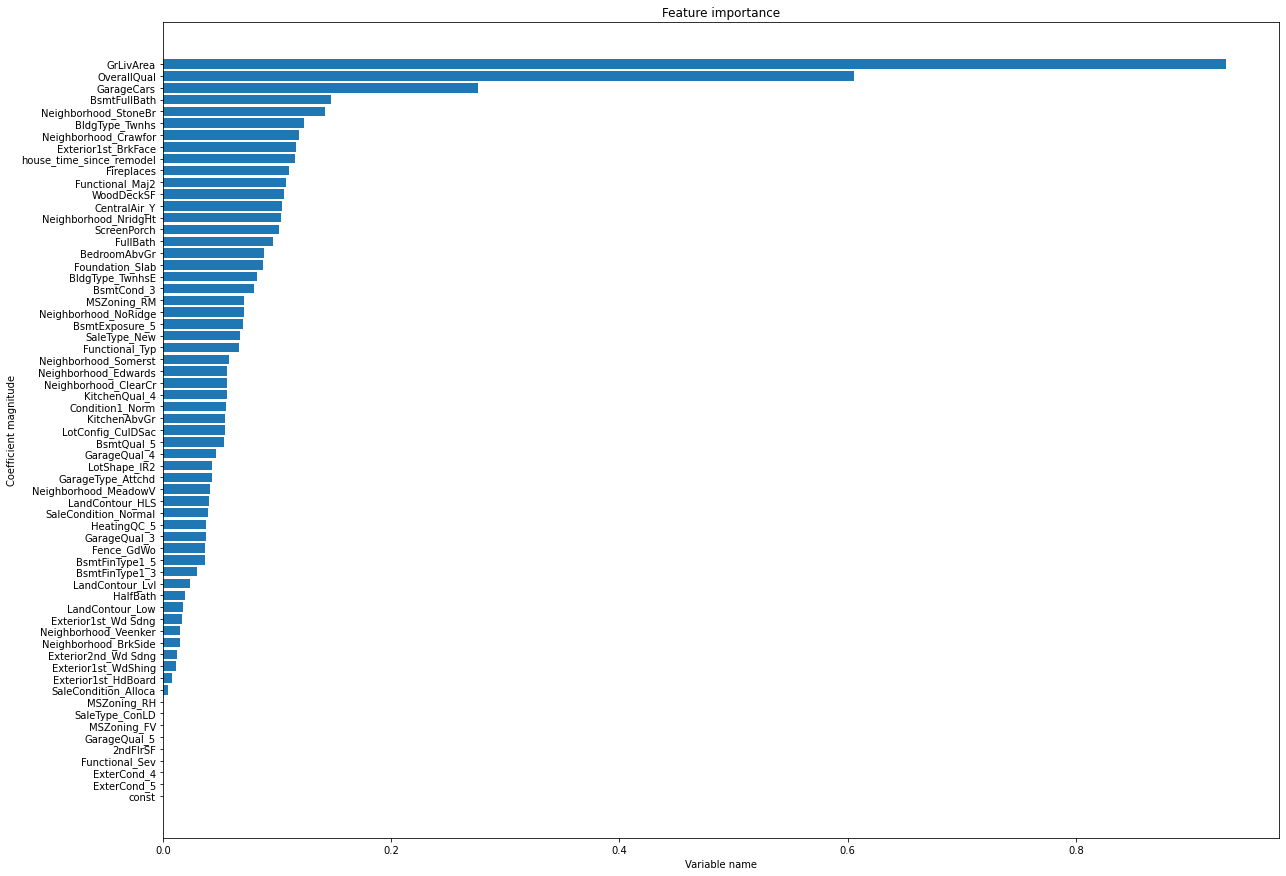

In [484]:
fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
fig, ax = plt.subplots(figsize=(20,15))
lasso_weights_opti = lasso_weights_opti.sort_values(by="weights_opti")
ax.barh(lasso_weights_opti['features_opti'],lasso_weights_opti['weights_opti'])
ax.set_ylabel('Coefficient magnitude')
ax.set_xlabel('Variable name')
ax.set_title('Feature importance')

In [485]:
y_test_pred = clf_lasso_opti.predict(X2_test[X2.columns])

#**Distribution of residuals is centered around 0 and is qualitatively normal distribution on predictions made on test data**

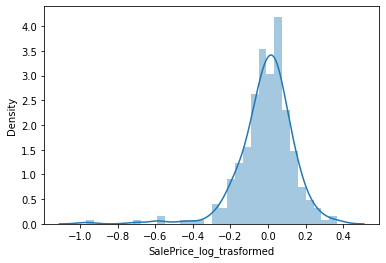

In [486]:
residuals = y_test - y_test_pred
sns.distplot(residuals)

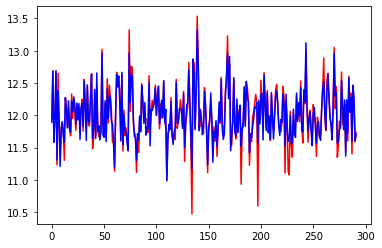

In [493]:
#plotting predicted vs actual value of y_train.
plt.plot(y_test.to_numpy(), color='r')
plt.plot(y_test_pred, color='b')
plt.show()

**What happens when we drop top 5 important features, which are next 5 most important features**

In [488]:
top5features = list()
top5features= ('GrLivArea','OverallQual','GarageCars','BsmtFullBath','Neighborhood_StoneBr')
x_without_top5_features = X2.copy()

for i in top5features:
  x_without_top5_features = x_without_top5_features.drop(i,axis=1)

In [489]:
clf = linear_model.Lasso(alpha=0.00056)
clf.fit(x_without_top5_features, y)
print("r2 score: ",clf.score(x_without_top5_features, y, sample_weight=None))

r2 score:  0.8350178801923342


**Next 5 most important features**

In [491]:
clf_lasso_next5_coeff = np.sqrt(np.square(clf.coef_))

lasso_weights_next5 = pd.DataFrame()
lasso_weights_next5['weights_opti']= pd.Series(clf_lasso_next5_coeff)
lasso_weights_next5['features_opti']= pd.Series(X2.columns)
lasso_weights_next5=lasso_weights_next5.sort_values(by="weights_opti",ascending=False)
lasso_weights_next5.head()
#

,weights_opti,features_opti
2,0.386432,2ndFlrSF
4,0.296475,BsmtFullBath
6,0.261665,HalfBath
45,0.205518,BsmtExposure_5
23,0.200470,Neighborhood_ClearCr
